<h1 style="text-align: center; color: #2E4053; font-family: Arial, sans-serif; padding: 20px; margin-bottom: 30px; border-bottom: 2px solid #34495E;">
    Ixpan Limited:<br>Insurance Healthcare Data Analysis Project
</h1>

## Project Outline

### Data Understanding & Preparation
1. Data Exploration
2. Data Quality and Reliability
3. Linking Individuals to Claims

### Anomaly & Pattern Detection
4. Outlier Detection
5. Feature Correlation Analysis 
6. Claims Patterns and Policy Abuse Detection

### Population Analysis
7. Impact of Population Demographics
8. Claim Closure Duration Analysis
9. Cost and Risk Segmentation

### Healthcare Provider Analysis
10. Hospital and Healthcare Provider (HCP) Analysis
11. Maternity and Chronic Conditions Analysis
12. Frequency of Diagnosis and Claim Gaps

### Advanced Analytics
13. Time Series Analysis of Claims
14. Mediation Analysis
15. Advanced Predictive Modeling

### Conclusions
16. Report & Insights

## Package Imports and Setup

In [1]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical computing
import numpy as np 

# Import seaborn for statistical data visualization
import seaborn as sns 

# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt 

# Import scipy.stats for statistical functions and tests
from scipy import stats 

In [63]:
# Import anomaly detection models
from sklearn.ensemble import IsolationForest  # For isolation forest anomaly detection
from sklearn.neighbors import LocalOutlierFactor  # For local outlier factor detection
from sklearn.svm import OneClassSVM  # For one-class SVM anomaly detection

# Import model training and preprocessing utilities
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.preprocessing import StandardScaler  # For standardizing features

In [64]:
from sklearn.decomposition import PCA

In [65]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Exploration

- Conduct a thorough analysis of the "Population" and "Claims" datasets to ensure proper understanding of all variables.
- Identify outliers using statistical methods (e.g., Z-scores, box plots).

## 1.1 Import & Base Description

In [66]:
claims_data = pd.read_excel('HealthCareData.xlsx', sheet_name='Sample Claims')
pop_data = pd.read_excel('HealthCareData.xlsx', sheet_name='Sample Population')

In [67]:
claims_data.head()

,Scheme ref,Insured Reference,HOF Reference,CLASS,COST_VALUE,DATE_OF_CLAIM,DATE_RECEIVED,VISIT_DATE,PROCESSING_STATUS,PROCESSING_DATE,...,DOCTOR_ID,HCP_CODE,HCP_TYPE,SPECIALTY,EFFECTIVE_DATE,ITEM_ID,CLAIMED_ITEM,ICD9_CODE,DIAGNOSIS,PROCESSING_RESULT
0,A,168,962,First,12.0,2023-08-29,2023-08-29 15:55:57,2023-08-29,FULLY PROCESSED,2023-09-18,...,12921,4,Lab,Lab,2023-04-01,82785,ASSAY OF GAMMAGLOBULIN IGE,477,ALLERGIC RHINITIS*,Claim adjusted according to the following sequ...
1,A,168,962,First,6.0,2023-08-29,2023-08-29 15:55:57,2023-08-29,FULLY PROCESSED,2023-09-18,...,12921,4,Lab,Lab,2023-04-01,85025,COMPLETE BLOOD COUNT (CBC),784,"HEADACHE , H/A",Claim adjusted according to the following sequ...
2,A,168,962,First,1.5,2023-08-29,2023-08-29 15:55:56,2023-08-29,FULLY PROCESSED,2023-09-18,...,12921,4,Lab,Lab,2023-04-01,85651,"RBC SED RATE, NONAUTOMATED , ESR",784,"HEADACHE , H/A",Claim adjusted according to the following sequ...
3,A,168,962,First,9.0,2023-08-28,2023-08-28 11:32:39,2023-08-28,FULLY PROCESSED,2023-09-18,...,19203,4,Lab,Lab,2023-04-01,82728,"ASSAY OF FERRITIN , FERRITIN",780.7,"MALAISE AND FATIGUE*,GENERAL WEAKNESS",Claim adjusted according to the following sequ...
4,A,168,962,First,9.0,2023-08-28,2023-08-28 11:32:39,2023-08-28,FULLY PROCESSED,2023-09-18,...,19203,4,Lab,Lab,2023-04-01,82607,"VITAMIN B-12 , B12",780.7,"MALAISE AND FATIGUE*,GENERAL WEAKNESS",Claim adjusted according to the following sequ...


In [68]:
pop_data.head()

,Scheme ref,Insured code,HoF code,DEPENDENT,GENDER,MARITAL_STATUS,AGE,ENROL_DATE,DATE_OF_BIRTH,EFF_DATE,EXPIRY_DATE,CLASS,DAYS,STATUS_DATE
0,A,1226,1226,Head Of Family,Male,Married,39,2023-04-01,1984-03-11,2023-04-01,2024-03-31,First,366,2024-03-31
1,A,424,1226,Child,Female,Single,11,2023-04-01,2012-02-27,2023-04-01,2024-03-31,First,366,2024-03-31
2,A,1525,1226,Spouse,Female,Married,30,2023-04-01,1992-07-09,2023-04-01,2024-03-31,First,366,2024-03-31
3,A,390,1226,Child,Male,Single,12,2023-04-01,2010-11-30,2023-04-01,2024-03-31,First,366,2024-03-31
4,A,84,1226,Child,Male,Single,3,2023-04-01,2019-07-16,2023-04-01,2024-03-31,First,366,2024-03-31


In [69]:
claims_data.describe()

,Insured Reference,HOF Reference,COST_VALUE,DATE_OF_CLAIM,DATE_RECEIVED,VISIT_DATE,PROCESSING_DATE,HCP_ID,DOCTOR_ID,HCP_CODE,EFFECTIVE_DATE
count,64924.000000,64924.000000,64924.000000,64924,64924,64924,64924,64924.000000,64924.000000,64924.000000,64924
mean,917.200604,1109.261290,10.424667,2023-08-07 01:03:50.004312832,2023-08-08 15:51:58.239449088,2023-08-06 20:59:36.711231488,2023-08-17 15:36:07.186248960,12142.806204,12215.143984,5.625516,2023-02-07 09:26:41.601873152
min,1.000000,1.000000,-1260.576000,2023-01-01 00:00:00,2023-01-01 10:57:34,2023-01-01 00:00:00,2023-01-16 00:00:00,2.000000,2.000000,1.000000,2023-01-01 00:00:00
25%,531.000000,961.000000,1.612000,2023-05-04 00:00:00,2023-05-06 14:05:27,2023-05-05 00:00:00,2023-05-21 00:00:00,6719.000000,6722.000000,4.000000,2023-01-01 00:00:00
50%,961.000000,1158.000000,4.441000,2023-08-10 00:00:00,2023-08-11 21:36:42,2023-08-10 00:00:00,2023-08-21 00:00:00,10466.000000,10718.000000,6.000000,2023-02-12 00:00:00
75%,1329.000000,1345.000000,9.999250,2023-11-11 00:00:00,2023-11-11 17:15:42.249999872,2023-11-11 00:00:00,2023-11-19 00:00:00,18020.000000,16545.000000,7.000000,2023-03-01 00:00:00
max,1719.000000,10002.000000,14011.524000,2024-03-23 00:00:00,2024-03-26 00:00:00,2024-03-23 00:00:00,2024-03-27 00:00:00,25675.000000,25675.000000,8.000000,2023-04-01 00:00:00
std,487.953994,424.100346,83.138239,NaN,NaN,NaN,NaN,6695.150695,6265.977332,1.850355,NaN


In [70]:
pop_data.describe()

,Insured code,HoF code,AGE,ENROL_DATE,DATE_OF_BIRTH,EFF_DATE,EXPIRY_DATE,DAYS,STATUS_DATE
count,1720.000000,1720.000000,1720.000000,1720,1720,1720,1720,1720.000000,1720
mean,860.500000,1116.823837,26.044186,2023-02-27 08:40:44.651162624,1996-08-20 09:46:02.790697728,2023-02-06 09:30:08.372093184,2024-02-05 20:22:19.534883584,365.452907,2024-01-20 16:47:09.767441920
min,1.000000,1.000000,0.000000,2023-01-01 00:00:00,1941-01-01 00:00:00,2023-01-01 00:00:00,2023-12-31 00:00:00,365.000000,2023-01-01 00:00:00
25%,430.750000,967.000000,10.000000,2023-01-01 00:00:00,1984-08-08 06:00:00,2023-01-01 00:00:00,2023-12-31 00:00:00,365.000000,2023-12-31 00:00:00
50%,860.500000,1151.000000,27.000000,2023-03-01 00:00:00,1995-05-27 12:00:00,2023-02-12 00:00:00,2024-02-11 00:00:00,365.000000,2024-02-11 00:00:00
75%,1290.250000,1348.000000,38.000000,2023-03-21 00:00:00,2012-09-02 18:00:00,2023-03-01 00:00:00,2024-02-29 00:00:00,366.000000,2024-02-29 00:00:00
max,1720.000000,10002.000000,82.000000,2024-03-10 00:00:00,2024-03-10 00:00:00,2023-04-01 00:00:00,2024-03-31 00:00:00,366.000000,2024-03-31 00:00:00
std,496.665548,528.200147,17.331330,NaN,NaN,NaN,NaN,0.497922,NaN


In [71]:
# Check if every 'insured_code' in population is present in 'insured_reference' in claim
missing_values = pop_data[~pop_data['Insured code'].isin(claims_data['Insured Reference'])]

# Display result
if missing_values.empty:
    print("All insured codes have a reference in the claim data.")
else:
    print("These insured codes are missing in the claim data:")
    print(missing_values)

These insured codes are missing in the claim data:
     Scheme ref  Insured code  HoF code       DEPENDENT  GENDER  \
41            A           840      1494           Child  Female   
75            A          1701       949           Child    Male   
77            A           208       949           Child    Male   
78            A           330       949           Child  Female   
81            A           410       981           Child  Female   
...         ...           ...       ...             ...     ...   
1677        H-S            36        36  Head Of Family    Male   
1690        H-S           417      1254           Child    Male   
1715        H-S          1395      1395  Head Of Family    Male   
1716        H-S           631      1395           Child  Female   
1717        H-S           708      1395           Child  Female   

     MARITAL_STATUS  AGE ENROL_DATE DATE_OF_BIRTH   EFF_DATE EXPIRY_DATE  \
41           Single    0 2024-03-10    2024-03-10 2023-04-01  2024-0

204 Insured code dont have a claim, so 1516 people have a claim

## 1.2 Statistical Outliers

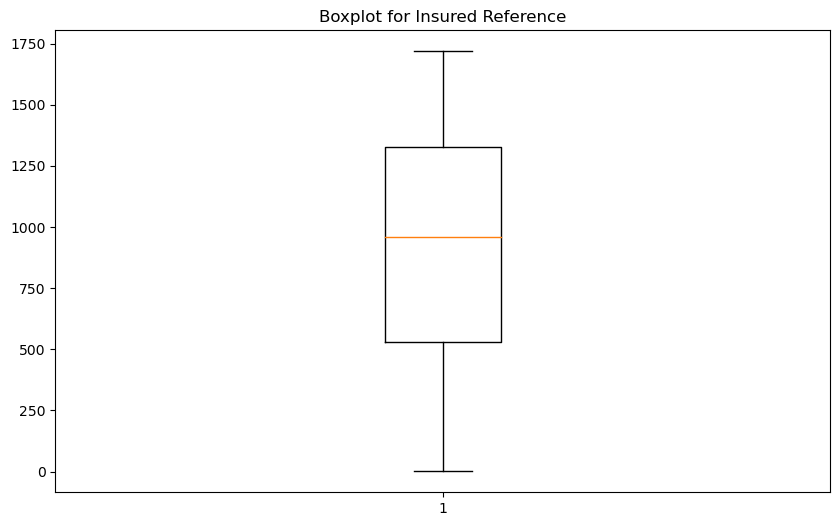

Outliers in Insured Reference based on Z-score: Empty DataFrame
Columns: [Scheme ref, Insured Reference, HOF Reference, CLASS, COST_VALUE, DATE_OF_CLAIM, DATE_RECEIVED, VISIT_DATE, PROCESSING_STATUS, PROCESSING_DATE, PAYMENT, VISIT_TYPE, Benefit, DEPENDANCE, HCP_ID, Indiciation, DOCTOR_ID, HCP_CODE, HCP_TYPE, SPECIALTY, EFFECTIVE_DATE, ITEM_ID, CLAIMED_ITEM, ICD9_CODE, DIAGNOSIS, PROCESSING_RESULT]
Index: []

[0 rows x 26 columns]


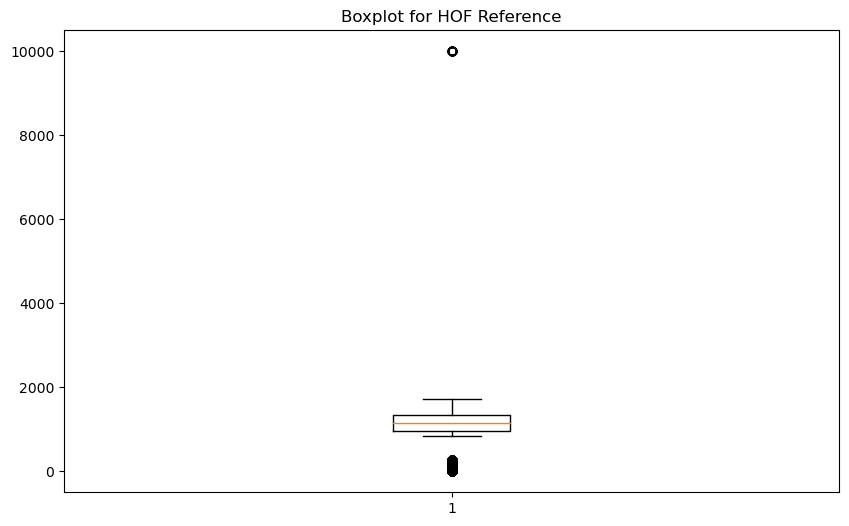

Outliers in HOF Reference based on Z-score:       Scheme ref  Insured Reference  HOF Reference  CLASS  COST_VALUE  \
58514        H-S               1662          10002  First       5.200   
58515        H-S               1662          10002  First       5.200   
58516        H-S               1662          10002  First       8.450   
58517        H-S               1662          10002  First      25.350   
58518        H-S               1662          10002  First       3.965   
58519        H-S               1662          10002  First      12.667   
58520        H-S               1662          10002  First      10.769   
58521        H-S               1662          10002  First       2.890   
58522        H-S               1662          10002  First       1.633   
58523        H-S               1662          10002  First       4.805   
58524        H-S               1662          10002  First       4.603   
58525        H-S               1662          10002  First       2.361   
58526  

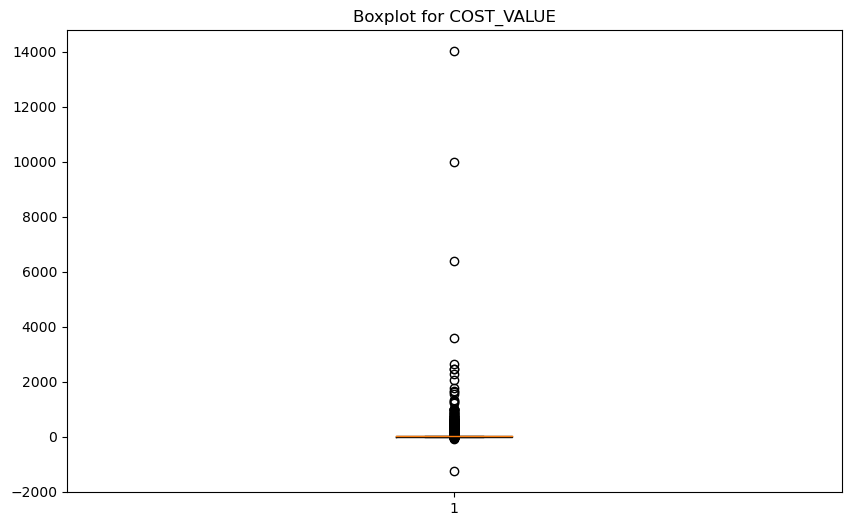

Outliers in COST_VALUE based on Z-score:       Scheme ref  Insured Reference  HOF Reference      CLASS  COST_VALUE  \
2877           A                902            902      First    3600.000   
2878           A                902            902      First    6400.000   
4379           A               1267           1174      First     352.800   
4515           A               1478           1177      First     352.800   
4655           A                949            949      First     300.000   
...          ...                ...            ...        ...         ...   
63720        H-S               1103           1103      First     261.586   
64212        H-S               1056           1056  Executive     300.000   
64277        H-S               1152           1152      First     308.000   
64734        H-S                689           1358      First     513.600   
64739        H-S                689           1358      First     300.000   

      DATE_OF_CLAIM       DATE_REC

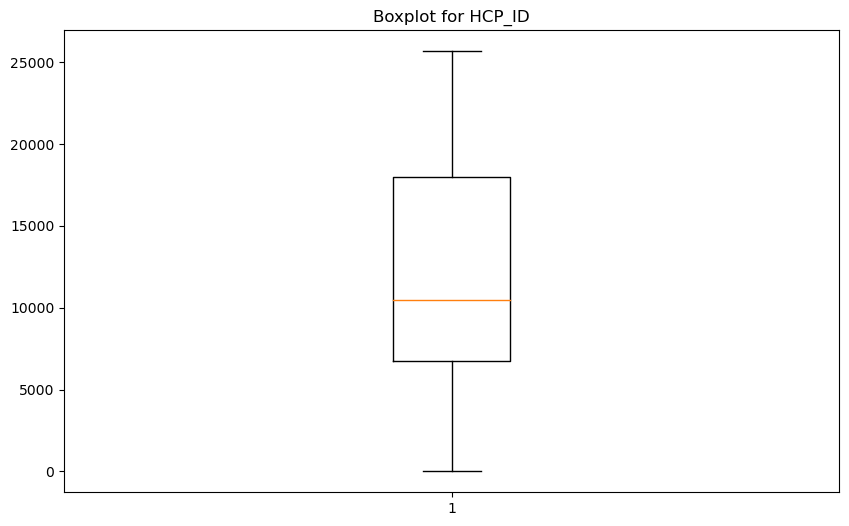

Outliers in HCP_ID based on Z-score: Empty DataFrame
Columns: [Scheme ref, Insured Reference, HOF Reference, CLASS, COST_VALUE, DATE_OF_CLAIM, DATE_RECEIVED, VISIT_DATE, PROCESSING_STATUS, PROCESSING_DATE, PAYMENT, VISIT_TYPE, Benefit, DEPENDANCE, HCP_ID, Indiciation, DOCTOR_ID, HCP_CODE, HCP_TYPE, SPECIALTY, EFFECTIVE_DATE, ITEM_ID, CLAIMED_ITEM, ICD9_CODE, DIAGNOSIS, PROCESSING_RESULT]
Index: []

[0 rows x 26 columns]


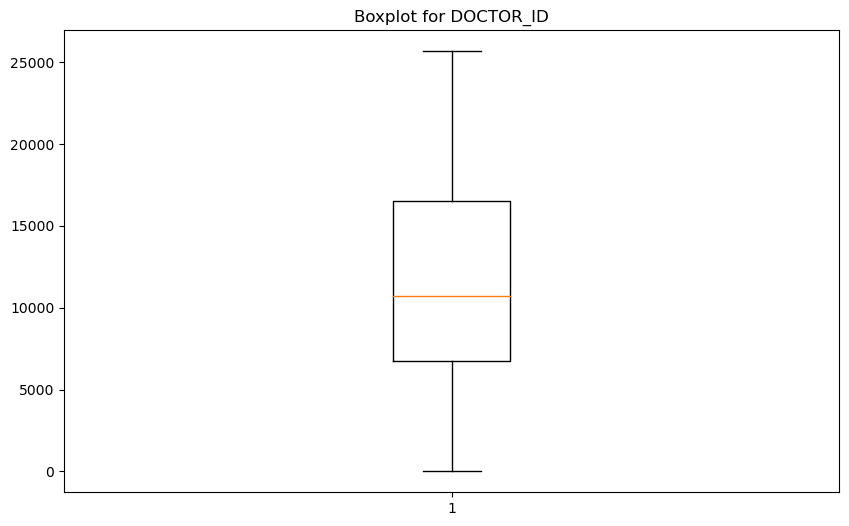

Outliers in DOCTOR_ID based on Z-score: Empty DataFrame
Columns: [Scheme ref, Insured Reference, HOF Reference, CLASS, COST_VALUE, DATE_OF_CLAIM, DATE_RECEIVED, VISIT_DATE, PROCESSING_STATUS, PROCESSING_DATE, PAYMENT, VISIT_TYPE, Benefit, DEPENDANCE, HCP_ID, Indiciation, DOCTOR_ID, HCP_CODE, HCP_TYPE, SPECIALTY, EFFECTIVE_DATE, ITEM_ID, CLAIMED_ITEM, ICD9_CODE, DIAGNOSIS, PROCESSING_RESULT]
Index: []

[0 rows x 26 columns]


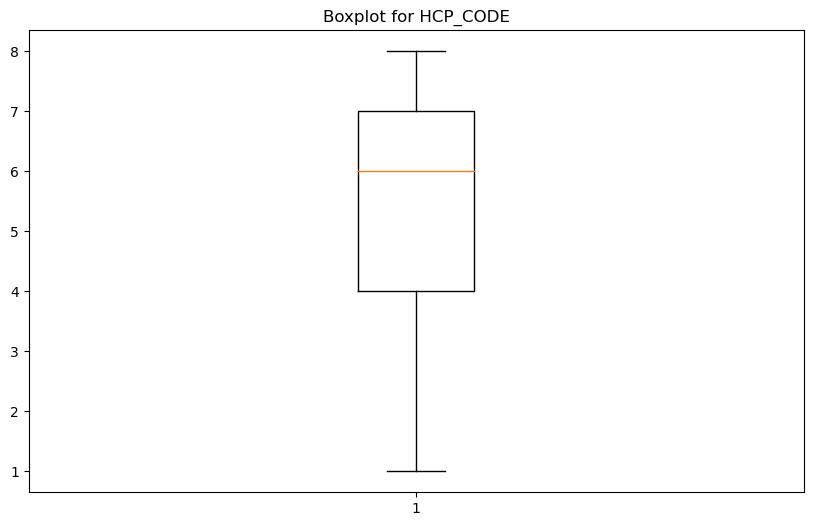

Outliers in HCP_CODE based on Z-score: Empty DataFrame
Columns: [Scheme ref, Insured Reference, HOF Reference, CLASS, COST_VALUE, DATE_OF_CLAIM, DATE_RECEIVED, VISIT_DATE, PROCESSING_STATUS, PROCESSING_DATE, PAYMENT, VISIT_TYPE, Benefit, DEPENDANCE, HCP_ID, Indiciation, DOCTOR_ID, HCP_CODE, HCP_TYPE, SPECIALTY, EFFECTIVE_DATE, ITEM_ID, CLAIMED_ITEM, ICD9_CODE, DIAGNOSIS, PROCESSING_RESULT]
Index: []

[0 rows x 26 columns]


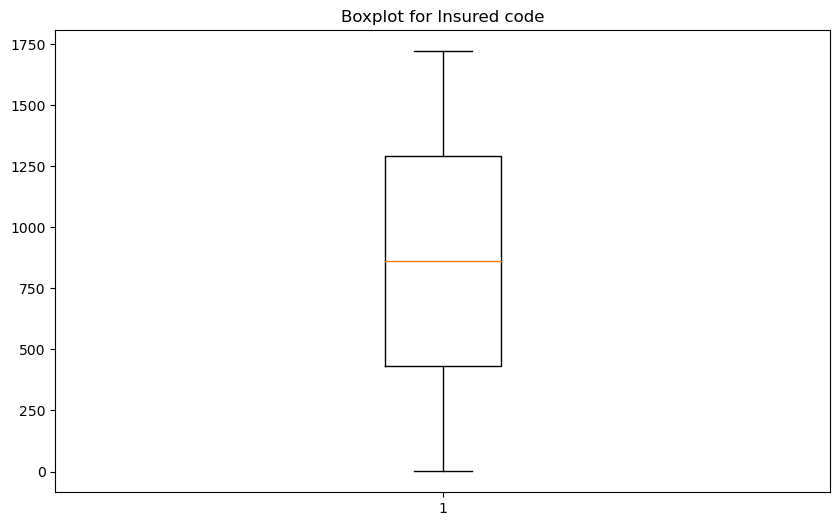

Outliers in Insured code based on Z-score: Empty DataFrame
Columns: [Scheme ref, Insured code, HoF code, DEPENDENT, GENDER, MARITAL_STATUS, AGE, ENROL_DATE, DATE_OF_BIRTH, EFF_DATE, EXPIRY_DATE, CLASS, DAYS, STATUS_DATE]
Index: []


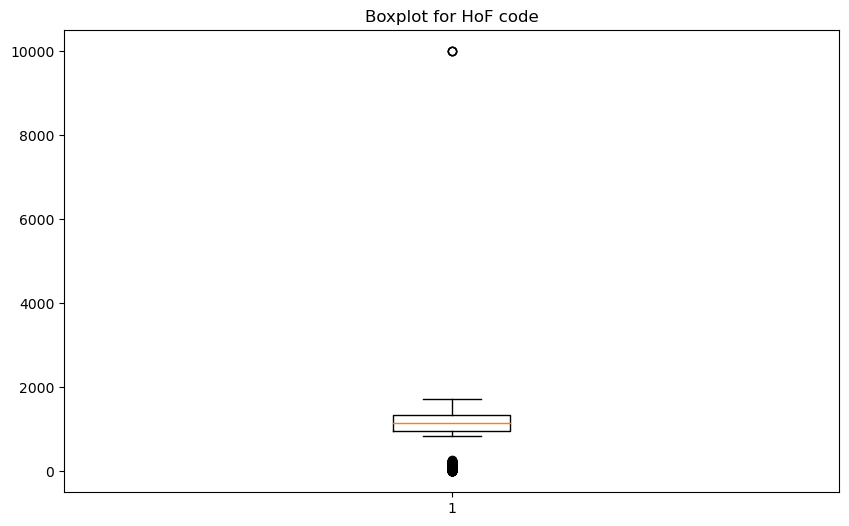

Outliers in HoF code based on Z-score:      Scheme ref  Insured code  HoF code DEPENDENT  GENDER MARITAL_STATUS  AGE  \
1067        E-H          1533     10000    Spouse  Female        Married   30   
1200        F-K          1720     10001     Child  Female         Single   23   
1627        H-S          1662     10002     Child  Female         Single   25   

     ENROL_DATE DATE_OF_BIRTH   EFF_DATE EXPIRY_DATE      CLASS  DAYS  \
1067 2023-01-01    1992-05-20 2023-01-01  2023-12-31      First   365   
1200 2023-01-01    1999-07-26 2023-01-01  2023-12-31  Executive   365   
1627 2023-02-12    1997-03-16 2023-02-12  2024-02-11      First   365   

     STATUS_DATE  
1067  2023-03-31  
1200  2023-06-01  
1627  2024-02-11  


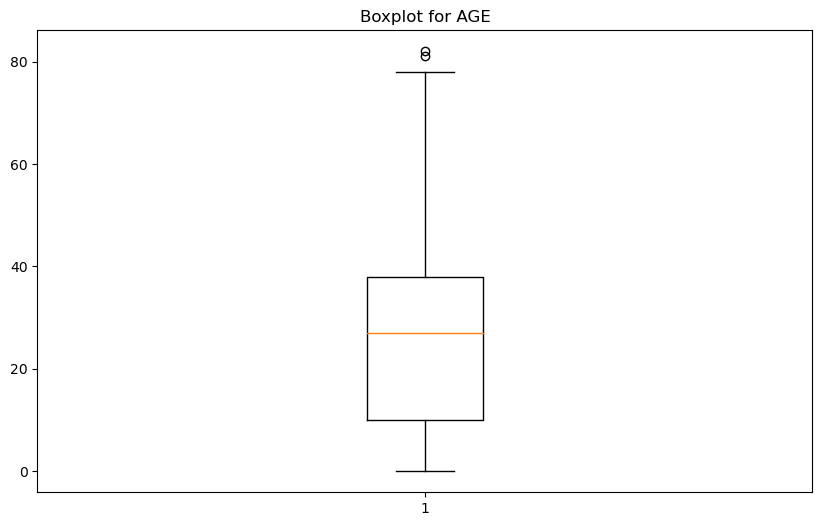

Outliers in AGE based on Z-score:      Scheme ref  Insured code  HoF code       DEPENDENT GENDER MARITAL_STATUS  \
1262        F-K           842       842  Head Of Family   Male        Married   
1358        F-K           843       843  Head Of Family   Male        Widowed   

      AGE ENROL_DATE DATE_OF_BIRTH   EFF_DATE EXPIRY_DATE   CLASS  DAYS  \
1262   82 2023-01-01    1941-01-01 2023-01-01  2023-12-31  Second   365   
1358   81 2023-01-01    1941-07-14 2023-01-01  2023-12-31   First   365   

     STATUS_DATE  
1262  2023-12-31  
1358  2023-12-31  


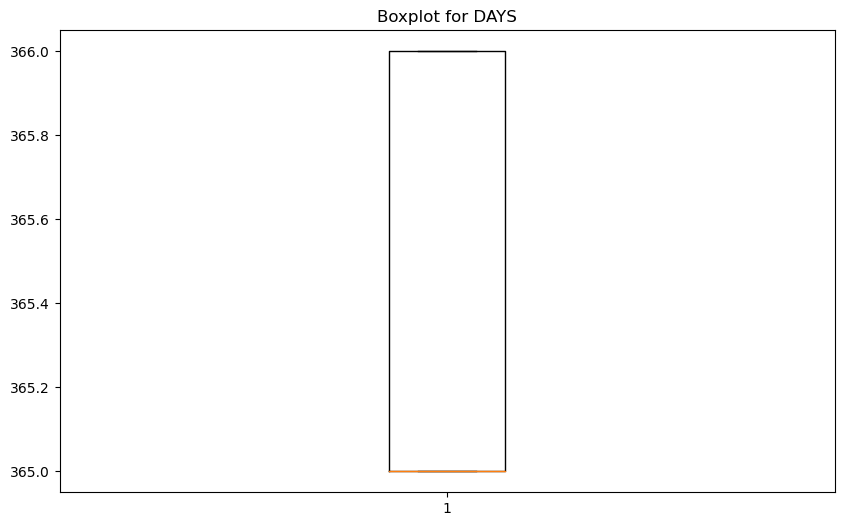

Outliers in DAYS based on Z-score: Empty DataFrame
Columns: [Scheme ref, Insured code, HoF code, DEPENDENT, GENDER, MARITAL_STATUS, AGE, ENROL_DATE, DATE_OF_BIRTH, EFF_DATE, EXPIRY_DATE, CLASS, DAYS, STATUS_DATE]
Index: []


In [72]:
# Define a function to identify base outliers

def detect_outlier(df, column_name):
    # Boxplot for visual outlier detection
    plt.figure(figsize=(10,6))
    plt.boxplot(df[column_name].dropna())
    plt.title(f'Boxplot for {column_name}') 
    plt.show()

    # Calculate the z-score for the column 
    z_scores = stats.zscore(df[column_name].dropna())
    outliers = np.where(np.abs(z_scores)>3)
    print(f"Outliers in {column_name} based on Z-score: {df.iloc[outliers]}")

# Can only be done to numeric columns
numeric_columns_claims = claims_data.select_dtypes(include=[np.number]).columns 
numeric_columns_pop = pop_data.select_dtypes(include=[np.number]).columns 

# Detect outliers for claims
for column in numeric_columns_claims: 
    detect_outlier(claims_data, column)

# Detect outliers for population
for column in numeric_columns_pop:
    detect_outlier(pop_data, column)

### 1.2 Results 

- Cost still does not reflect since the claims have not been joined yet, and seems to be highly dependent on other factors which we will explore in future sections 
- Two elderly were found to be outliers with one in second and the other in first, would need to examine claims accorindly 

# 2. Data Quality and Reliability 

## 2.1 Data Consistency Check 

In [73]:
# Check null values 
print(claims_data.isnull().sum())
print(pop_data.isnull().sum())

Scheme ref           0
Insured Reference    0
HOF Reference        0
CLASS                0
COST_VALUE           0
DATE_OF_CLAIM        0
DATE_RECEIVED        0
VISIT_DATE           0
PROCESSING_STATUS    0
PROCESSING_DATE      0
PAYMENT              0
VISIT_TYPE           0
Benefit              0
DEPENDANCE           0
HCP_ID               0
Indiciation          0
DOCTOR_ID            0
HCP_CODE             0
HCP_TYPE             0
SPECIALTY            0
EFFECTIVE_DATE       0
ITEM_ID              0
CLAIMED_ITEM         0
ICD9_CODE            3
DIAGNOSIS            3
PROCESSING_RESULT    0
dtype: int64
Scheme ref        0
Insured code      0
HoF code          0
DEPENDENT         0
GENDER            0
MARITAL_STATUS    0
AGE               0
ENROL_DATE        0
DATE_OF_BIRTH     0
EFF_DATE          0
EXPIRY_DATE       0
CLASS             0
DAYS              0
STATUS_DATE       0
dtype: int64


In [74]:
# Check missing values 
print(claims_data.isna().sum())
print(pop_data.isna().sum())

Scheme ref           0
Insured Reference    0
HOF Reference        0
CLASS                0
COST_VALUE           0
DATE_OF_CLAIM        0
DATE_RECEIVED        0
VISIT_DATE           0
PROCESSING_STATUS    0
PROCESSING_DATE      0
PAYMENT              0
VISIT_TYPE           0
Benefit              0
DEPENDANCE           0
HCP_ID               0
Indiciation          0
DOCTOR_ID            0
HCP_CODE             0
HCP_TYPE             0
SPECIALTY            0
EFFECTIVE_DATE       0
ITEM_ID              0
CLAIMED_ITEM         0
ICD9_CODE            3
DIAGNOSIS            3
PROCESSING_RESULT    0
dtype: int64
Scheme ref        0
Insured code      0
HoF code          0
DEPENDENT         0
GENDER            0
MARITAL_STATUS    0
AGE               0
ENROL_DATE        0
DATE_OF_BIRTH     0
EFF_DATE          0
EXPIRY_DATE       0
CLASS             0
DAYS              0
STATUS_DATE       0
dtype: int64


In [75]:
# Check data types 
print(claims_data.dtypes)
print(pop_data.dtypes)

Scheme ref                   object
Insured Reference             int64
HOF Reference                 int64
CLASS                        object
COST_VALUE                  float64
DATE_OF_CLAIM        datetime64[ns]
DATE_RECEIVED        datetime64[ns]
VISIT_DATE           datetime64[ns]
PROCESSING_STATUS            object
PROCESSING_DATE      datetime64[ns]
PAYMENT                      object
VISIT_TYPE                   object
Benefit                      object
DEPENDANCE                   object
HCP_ID                        int64
Indiciation                  object
DOCTOR_ID                     int64
HCP_CODE                      int64
HCP_TYPE                     object
SPECIALTY                    object
EFFECTIVE_DATE       datetime64[ns]
ITEM_ID                      object
CLAIMED_ITEM                 object
ICD9_CODE                    object
DIAGNOSIS                    object
PROCESSING_RESULT            object
dtype: object
Scheme ref                object
Insured code     

In [76]:
# Check duplicates
print(claims_data.duplicated().sum())
print(pop_data.duplicated().sum())

231
0


In [77]:
# Check for inconsistent claim date
incon_claim_date = claims_data[claims_data["DATE_OF_CLAIM"]>claims_data["DATE_RECEIVED"]]
print(incon_claim_date)

Empty DataFrame
Columns: [Scheme ref, Insured Reference, HOF Reference, CLASS, COST_VALUE, DATE_OF_CLAIM, DATE_RECEIVED, VISIT_DATE, PROCESSING_STATUS, PROCESSING_DATE, PAYMENT, VISIT_TYPE, Benefit, DEPENDANCE, HCP_ID, Indiciation, DOCTOR_ID, HCP_CODE, HCP_TYPE, SPECIALTY, EFFECTIVE_DATE, ITEM_ID, CLAIMED_ITEM, ICD9_CODE, DIAGNOSIS, PROCESSING_RESULT]
Index: []

[0 rows x 26 columns]


In [78]:
# Under age marriage 
incon_age_marital = pop_data[(pop_data['MARITAL_STATUS']=='Married') & (pop_data["AGE"]<18)]
print(incon_age_marital)

Empty DataFrame
Columns: [Scheme ref, Insured code, HoF code, DEPENDENT, GENDER, MARITAL_STATUS, AGE, ENROL_DATE, DATE_OF_BIRTH, EFF_DATE, EXPIRY_DATE, CLASS, DAYS, STATUS_DATE]
Index: []


## 2.2 Data Reliabitity Check

In [79]:
# Claims range 
out_of_range_claims_amount = claims_data[claims_data["COST_VALUE"]<0]
print(out_of_range_claims_amount)

      Scheme ref  Insured Reference  HOF Reference      CLASS  COST_VALUE  \
18392          B               1280           1280      First     -35.000   
18445          B               1280           1280      First     -17.500   
19676        C-E                281           1055      First   -1260.576   
19710        C-E                584           1045      First      -0.491   
33479        C-E               1262           1005      First     -48.900   
...          ...                ...            ...        ...         ...   
55798        F-K                906            896  Executive      -1.286   
55799        F-K                906            896  Executive     -60.330   
55800        F-K                906            896  Executive      -0.834   
55801        F-K                906            896  Executive      -3.156   
55802        F-K                906            896  Executive      -2.392   

      DATE_OF_CLAIM       DATE_RECEIVED VISIT_DATE PROCESSING_STATUS  \
183

# 3. Link Individuals to Claims 

## 3.1 Merge Claims and Population

In [80]:
# Merge the population dataset with claims dataset 

# First ensure that they are both the same type 
pop_data["Insured code"] = pop_data["Insured code"].astype(str)
claims_data["Insured Reference"] = claims_data["Insured Reference"].astype(str)

# Perform inner join to ensure they exist in claims 
merged_data = pd.merge(claims_data, pop_data, left_on='Insured Reference', right_on='Insured code', how='inner')

merged_data

,Scheme ref_x,Insured Reference,HOF Reference,CLASS_x,COST_VALUE,DATE_OF_CLAIM,DATE_RECEIVED,VISIT_DATE,PROCESSING_STATUS,PROCESSING_DATE,...,GENDER,MARITAL_STATUS,AGE,ENROL_DATE,DATE_OF_BIRTH,EFF_DATE,EXPIRY_DATE,CLASS_y,DAYS,STATUS_DATE
0,A,168,962,First,12.0,2023-08-29,2023-08-29 15:55:57,2023-08-29,FULLY PROCESSED,2023-09-18,...,Male,Single,22,2023-04-01,2000-09-26,2023-04-01,2024-03-31,First,366,2024-03-31
1,A,168,962,First,6.0,2023-08-29,2023-08-29 15:55:57,2023-08-29,FULLY PROCESSED,2023-09-18,...,Male,Single,22,2023-04-01,2000-09-26,2023-04-01,2024-03-31,First,366,2024-03-31
2,A,168,962,First,1.5,2023-08-29,2023-08-29 15:55:56,2023-08-29,FULLY PROCESSED,2023-09-18,...,Male,Single,22,2023-04-01,2000-09-26,2023-04-01,2024-03-31,First,366,2024-03-31
3,A,168,962,First,9.0,2023-08-28,2023-08-28 11:32:39,2023-08-28,FULLY PROCESSED,2023-09-18,...,Male,Single,22,2023-04-01,2000-09-26,2023-04-01,2024-03-31,First,366,2024-03-31
4,A,168,962,First,9.0,2023-08-28,2023-08-28 11:32:39,2023-08-28,FULLY PROCESSED,2023-09-18,...,Male,Single,22,2023-04-01,2000-09-26,2023-04-01,2024-03-31,First,366,2024-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64919,H-S,242,963,First,8.0,2023-10-24,2023-10-24 22:37:33,2023-10-24,FULLY PROCESSED,2023-10-29,...,Male,Single,18,2023-02-12,2004-04-11,2023-02-12,2024-02-11,First,365,2024-02-11
64920,H-S,242,963,First,8.0,2023-10-24,2023-10-24 21:56:49,2023-10-24,FULLY PROCESSED,2023-10-29,...,Male,Single,18,2023-02-12,2004-04-11,2023-02-12,2024-02-11,First,365,2024-02-11
64921,H-S,242,963,First,15.0,2023-11-02,2023-11-02 11:30:18,2023-11-02,FULLY PROCESSED,2023-11-16,...,Male,Single,18,2023-02-12,2004-04-11,2023-02-12,2024-02-11,First,365,2024-02-11
64922,H-S,242,963,First,8.5,2023-09-20,2023-09-20 12:46:05,2023-09-20,FULLY PROCESSED,2023-09-21,...,Male,Single,18,2023-02-12,2004-04-11,2023-02-12,2024-02-11,First,365,2024-02-11


In [81]:
merged_data.columns

Index(['Scheme ref_x', 'Insured Reference', 'HOF Reference', 'CLASS_x',
       'COST_VALUE', 'DATE_OF_CLAIM', 'DATE_RECEIVED', 'VISIT_DATE',
       'PROCESSING_STATUS', 'PROCESSING_DATE', 'PAYMENT', 'VISIT_TYPE',
       'Benefit', 'DEPENDANCE', 'HCP_ID', 'Indiciation', 'DOCTOR_ID',
       'HCP_CODE', 'HCP_TYPE', 'SPECIALTY', 'EFFECTIVE_DATE', 'ITEM_ID',
       'CLAIMED_ITEM', 'ICD9_CODE', 'DIAGNOSIS', 'PROCESSING_RESULT',
       'Scheme ref_y', 'Insured code', 'HoF code', 'DEPENDENT', 'GENDER',
       'MARITAL_STATUS', 'AGE', 'ENROL_DATE', 'DATE_OF_BIRTH', 'EFF_DATE',
       'EXPIRY_DATE', 'CLASS_y', 'DAYS', 'STATUS_DATE'],
      dtype='object')

In [82]:
# Lets make sure they are equal row by row 
print(merged_data['Scheme ref_x'].equals(merged_data["Scheme ref_y"]))
print(merged_data['CLASS_x'].equals(merged_data['CLASS_y']))
print(merged_data['Insured Reference'].equals(merged_data['Insured code']))

True
True
True


In [83]:
# Clean by dropping duplicate columns 
merged_data = merged_data.drop(['Scheme ref_y', 'CLASS_y', 'Insured code'], axis=1)

In [84]:
# Rename some columns 
merged_data = merged_data.rename(columns={
    'Scheme ref_x': 'Scheme ref',
    'CLASS_x': 'CLASS'
})

In [85]:
merged_data.to_csv('merged_hcd.csv', index=False)

In [86]:
# Check gender distribution
gender_distribution = merged_data['GENDER'].value_counts()

print(gender_distribution)

GENDER
Male      33506
Female    31418
Name: count, dtype: int64


## 3.2 Join Claims

Features I need to Keep? 
Computing time lag? 
Aggreating the rest? Checking for correctness

In [87]:
# To detect conflicts in categorical values
def detect_conflict(series):
    if series.nunique() > 1: 
        return 'Conflict'
    return series.mode()[0] # Return most recent value 

# Confirming the format
merged_data['DATE_OF_CLAIM'] = pd.to_datetime(merged_data['DATE_OF_CLAIM'])

# Sorting the values 
merged_data = merged_data.sort_values(by=['Insured Reference', 'DATE_OF_CLAIM'])

# Group the data and compute the relevant columns 
grouped_data_extended = merged_data.groupby(['Insured Reference', 'DATE_OF_CLAIM']).agg(
    num_rows_per_claim = ('Insured Reference', 'size'),
    total_cost = ('COST_VALUE', 'sum'),
    num_doctor_visits = ('DOCTOR_ID', pd.Series.nunique),
    class_value = ('CLASS', detect_conflict),
    gender = ('GENDER', detect_conflict),
    marital_status = ('MARITAL_STATUS', detect_conflict),
    age = ('AGE', 'mean')
).reset_index()

# Add the gap between claims, shift 1 
grouped_data_extended['previous_claim_date'] = grouped_data_extended.groupby('Insured Reference')['DATE_OF_CLAIM'].shift(1)
grouped_data_extended['time_lag'] = (grouped_data_extended['DATE_OF_CLAIM']-grouped_data_extended['previous_claim_date'])

In [88]:
grouped_data_extended

,Insured Reference,DATE_OF_CLAIM,num_rows_per_claim,total_cost,num_doctor_visits,class_value,gender,marital_status,age,previous_claim_date,time_lag
0,1,2023-01-07,7,57.559,1,Second,Male,Married,43.0,NaT,NaT
1,1,2023-02-06,4,48.395,1,Second,Male,Married,43.0,2023-01-07,30 days
2,1,2023-03-15,4,48.395,1,Second,Male,Married,43.0,2023-02-06,37 days
3,1,2023-04-12,7,57.559,1,Second,Male,Married,43.0,2023-03-15,28 days
4,1,2023-05-09,4,48.395,1,Second,Male,Married,43.0,2023-04-12,27 days
...,...,...,...,...,...,...,...,...,...,...,...
12580,999,2024-02-24,17,148.257,1,First,Female,Married,49.0,2024-02-19,5 days
12581,999,2024-02-28,4,36.587,1,First,Female,Married,49.0,2024-02-24,4 days
12582,999,2024-02-29,15,103.572,3,First,Female,Married,49.0,2024-02-28,1 days
12583,999,2024-03-02,2,10.800,1,First,Female,Married,49.0,2024-02-29,2 days


In [89]:
grouped_data_extended.describe()

,DATE_OF_CLAIM,num_rows_per_claim,total_cost,num_doctor_visits,age,previous_claim_date,time_lag
count,12585,12585.000000,12585.000000,12585.000000,12585.000000,11069,11069
mean,2023-08-07 15:31:37.401668864,5.158840,53.779186,1.038697,30.815574,2023-07-24 16:35:36.127924736,27 days 20:26:07.621284669
min,2023-01-01 00:00:00,1.000000,-67.998000,1.000000,0.000000,2023-01-01 00:00:00,1 days 00:00:00
25%,2023-05-06 00:00:00,2.000000,12.326000,1.000000,16.000000,2023-04-27 00:00:00,3 days 00:00:00
50%,2023-08-12 00:00:00,4.000000,25.762000,1.000000,32.000000,2023-07-25 00:00:00,15 days 00:00:00
75%,2023-11-09 00:00:00,7.000000,50.093000,1.000000,44.000000,2023-10-19 00:00:00,33 days 00:00:00
max,2024-03-23 00:00:00,48.000000,16864.424000,4.000000,81.000000,2024-03-22 00:00:00,334 days 00:00:00
std,NaN,4.952359,249.866690,0.204867,18.405579,NaN,38 days 15:51:59.076205646


In [90]:
grouped_data_extended.to_csv('Grouped_Data_Extended.csv', index=False)

In [91]:
grouped_data_extended.columns

Index(['Insured Reference', 'DATE_OF_CLAIM', 'num_rows_per_claim',
       'total_cost', 'num_doctor_visits', 'class_value', 'gender',
       'marital_status', 'age', 'previous_claim_date', 'time_lag'],
      dtype='object')

In [92]:
# Check gender distribution
gender_distribution_2 = grouped_data_extended['gender'].value_counts()

print(gender_distribution_2)

gender
Male      6557
Female    6028
Name: count, dtype: int64


### Visualization of Grouped Dataset

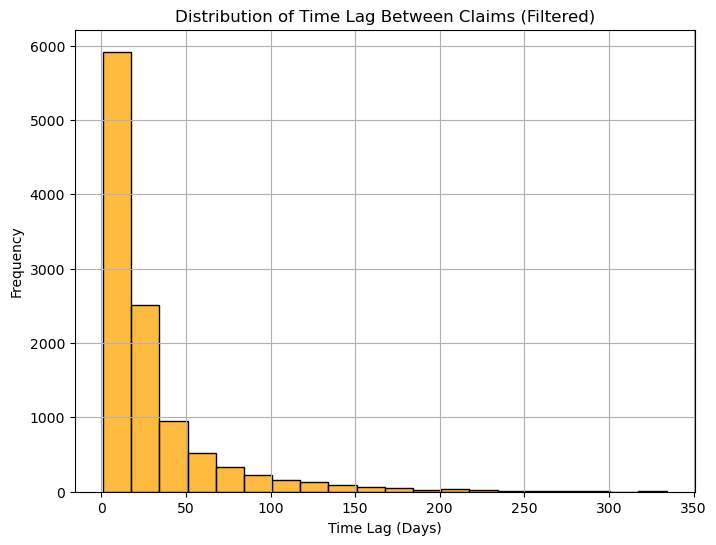

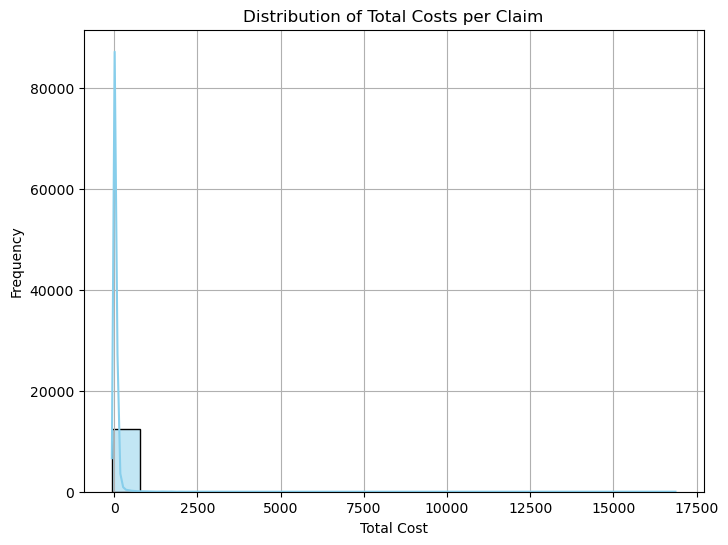

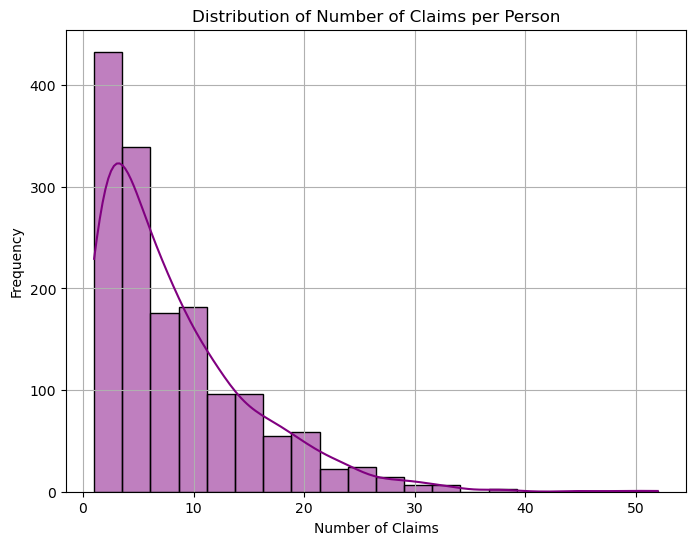

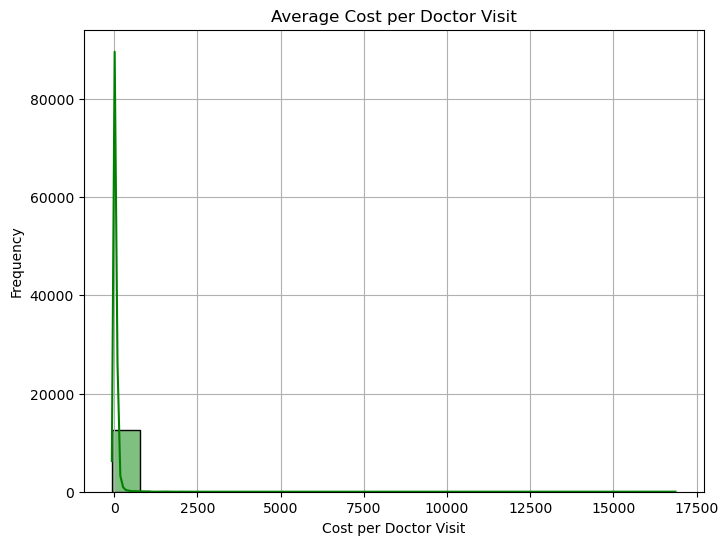

In [93]:
# Converting the 'time_lag' column to timedelta type if it's not already
grouped_data_extended['time_lag'] = pd.to_timedelta(grouped_data_extended['time_lag'], errors='coerce')

# Now converting 'time_lag' to days for proper comparison
grouped_data_extended['time_lag_days'] = grouped_data_extended['time_lag'].dt.days

# Filtering the data for time lags that are less than or equal to 365 days
filtered_data = grouped_data_extended[grouped_data_extended['time_lag_days'] <= 365]

# Re-plotting the distribution of time lag without the kde option to save memory
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['time_lag_days'].dropna(), bins=20, color='orange')
plt.title('Distribution of Time Lag Between Claims (Filtered)')
plt.xlabel('Time Lag (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Total Costs per Claim
plt.figure(figsize=(8, 6))
sns.histplot(grouped_data_extended['total_cost'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Costs per Claim')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Distribution of Number of Claims per Person (Insured Reference)
plt.figure(figsize=(8, 6))
claims_distribution = grouped_data_extended['Insured Reference'].value_counts()
sns.histplot(claims_distribution, bins=20, kde=True, color='purple')
plt.title('Distribution of Number of Claims per Person')
plt.xlabel('Number of Claims')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Average Cost per Doctor Visit
plt.figure(figsize=(8, 6))
grouped_data_extended['cost_per_doctor_visit'] = grouped_data_extended['total_cost'] / grouped_data_extended['num_doctor_visits']
sns.histplot(grouped_data_extended['cost_per_doctor_visit'].dropna(), bins=20, kde=True, color='green')
plt.title('Average Cost per Doctor Visit')
plt.xlabel('Cost per Doctor Visit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 4. Anomaly Detection with ML 

## 4.1 Preprocessing

In [94]:
print(grouped_data_extended.isnull().sum())
grouped_data_extended.head()

Insured Reference           0
DATE_OF_CLAIM               0
num_rows_per_claim          0
total_cost                  0
num_doctor_visits           0
class_value                 0
gender                      0
marital_status              0
age                         0
previous_claim_date      1516
time_lag                 1516
time_lag_days            1516
cost_per_doctor_visit       0
dtype: int64


,Insured Reference,DATE_OF_CLAIM,num_rows_per_claim,total_cost,num_doctor_visits,class_value,gender,marital_status,age,previous_claim_date,time_lag,time_lag_days,cost_per_doctor_visit
0,1,2023-01-07,7,57.559,1,Second,Male,Married,43.0,NaT,NaT,NaN,57.559
1,1,2023-02-06,4,48.395,1,Second,Male,Married,43.0,2023-01-07,30 days,30.0,48.395
2,1,2023-03-15,4,48.395,1,Second,Male,Married,43.0,2023-02-06,37 days,37.0,48.395
3,1,2023-04-12,7,57.559,1,Second,Male,Married,43.0,2023-03-15,28 days,28.0,57.559
4,1,2023-05-09,4,48.395,1,Second,Male,Married,43.0,2023-04-12,27 days,27.0,48.395


These Nan values are caused by the `.shift()` function. We replace these values with 0. 

In [95]:
# Filling missing time lags with 0 (for first claims)
dataset_filled = grouped_data_extended.fillna({'time_lag': pd.Timedelta(0), 'time_lag_days': 0})
dataset_filled = dataset_filled.fillna({'previous_claim_date': pd.Timedelta(0), 'previous_claim_date': 0})


In [96]:
print(dataset_filled.isnull().sum())

Insured Reference        0
DATE_OF_CLAIM            0
num_rows_per_claim       0
total_cost               0
num_doctor_visits        0
class_value              0
gender                   0
marital_status           0
age                      0
previous_claim_date      0
time_lag                 0
time_lag_days            0
cost_per_doctor_visit    0
dtype: int64


In [97]:
# Use one hot encoding for categorical values
dataset_encoded = pd.get_dummies(dataset_filled, columns=['class_value', 'gender', 'marital_status'], drop_first=False)

In [98]:
dataset_encoded.columns

Index(['Insured Reference', 'DATE_OF_CLAIM', 'num_rows_per_claim',
       'total_cost', 'num_doctor_visits', 'age', 'previous_claim_date',
       'time_lag', 'time_lag_days', 'cost_per_doctor_visit',
       'class_value_Executive', 'class_value_First', 'class_value_Second',
       'class_value_Third', 'gender_Female', 'gender_Male',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed'],
      dtype='object')

## 4.2 ML Methods

### Isolation Forest
Isolation Forest is an unsupervised machine learning technique for detecting outliers by isolating observations. It works by constructing random decision trees and isolating points based on how easily they are separated from the rest of the data. The fewer splits required to isolate a point, the more likely it is an outlier.
- Why use it? It's efficient for high-dimensional datasets and can handle large amounts of data. It’s particularly effective when the number of outliers is small compared to the normal data points.

### Local Outlier Factor (LOF)
Local Outlier Factor (LOF) is an unsupervised algorithm that identifies anomalies based on the density of data points. It compares the local density of a point to its neighbors; if a point’s density is significantly lower than its neighbors, it is classified as an outlier.
- Why use it? It’s useful for detecting local anomalies where the data points may have different densities in different regions, and it can uncover outliers that are close to their neighbors but still deviate from the local pattern.

### One-Class SVM
One-Class Support Vector Machine (SVM) is a classification method used for outlier detection, treating outliers as data points that do not conform to the expected distribution. It works by finding a boundary (hyperplane) that separates the normal data from outliers in a high-dimensional space.
- Why use it? It’s well-suited for situations where you only have access to the normal class data and can generalize to detect anomalies in test data. It works best for small- to medium-sized datasets with known distribution characteristics.


In [99]:
# feature selection for ml models 
# Select both numeric and one-hot encoded categorical features
numeric_features = dataset_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [100]:
# Scale the features
scaler =  StandardScaler()
X = scaler.fit_transform(dataset_encoded[numeric_features])

In [101]:
anomaly_ml_results = dataset_encoded

In [102]:
# Apply Iso Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
anomaly_ml_results['anomaly_iso'] = iso_forest.fit_predict(X)
anomaly_ml_results['is_anomaly_iso'] = anomaly_ml_results['anomaly_iso'].apply(lambda x: 'Anomaly' if x==-1 else 'Normal')

In [103]:
# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
anomaly_ml_results['anomaly_lof'] = lof.fit_predict(X)
anomaly_ml_results['is_anomaly_lof'] = anomaly_ml_results['anomaly_lof'].apply(lambda x: 'Anomaly' if x==-1 else 'Normal')

In [104]:
# Apply One-Class SVM 
oc_svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='auto')
anomaly_ml_results['anomaly_svm'] = oc_svm.fit_predict(X)
anomaly_ml_results['is_anomaly_svm'] = anomaly_ml_results['anomaly_svm'].apply(lambda x: 'Anomaly' if x==-1 else 'Normal')

In [105]:
anomaly_ml_results.columns

Index(['Insured Reference', 'DATE_OF_CLAIM', 'num_rows_per_claim',
       'total_cost', 'num_doctor_visits', 'age', 'previous_claim_date',
       'time_lag', 'time_lag_days', 'cost_per_doctor_visit',
       'class_value_Executive', 'class_value_First', 'class_value_Second',
       'class_value_Third', 'gender_Female', 'gender_Male',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Widowed', 'anomaly_iso',
       'is_anomaly_iso', 'anomaly_lof', 'is_anomaly_lof', 'anomaly_svm',
       'is_anomaly_svm'],
      dtype='object')

In [106]:
anomaly_ml_results.head()

,Insured Reference,DATE_OF_CLAIM,num_rows_per_claim,total_cost,num_doctor_visits,age,previous_claim_date,time_lag,time_lag_days,cost_per_doctor_visit,...,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,anomaly_iso,is_anomaly_iso,anomaly_lof,is_anomaly_lof,anomaly_svm,is_anomaly_svm
0,1,2023-01-07,7,57.559,1,43.0,0,0 days,0.0,57.559,...,False,True,False,False,1,Normal,1,Normal,1,Normal
1,1,2023-02-06,4,48.395,1,43.0,2023-01-07 00:00:00,30 days,30.0,48.395,...,False,True,False,False,1,Normal,1,Normal,1,Normal
2,1,2023-03-15,4,48.395,1,43.0,2023-02-06 00:00:00,37 days,37.0,48.395,...,False,True,False,False,1,Normal,1,Normal,1,Normal
3,1,2023-04-12,7,57.559,1,43.0,2023-03-15 00:00:00,28 days,28.0,57.559,...,False,True,False,False,1,Normal,1,Normal,1,Normal
4,1,2023-05-09,4,48.395,1,43.0,2023-04-12 00:00:00,27 days,27.0,48.395,...,False,True,False,False,1,Normal,1,Normal,1,Normal


In [107]:
# Check anomaly counts
print("Isolation Forest Anomalies:\n", anomaly_ml_results['is_anomaly_iso'].value_counts())
print("LOF Anomalies:\n", anomaly_ml_results['is_anomaly_lof'].value_counts())
print("One-Class SVM Anomalies:\n", anomaly_ml_results['is_anomaly_svm'].value_counts())

Isolation Forest Anomalies:
 is_anomaly_iso
Normal     11955
Anomaly      630
Name: count, dtype: int64
LOF Anomalies:
 is_anomaly_lof
Normal     11955
Anomaly      630
Name: count, dtype: int64
One-Class SVM Anomalies:
 is_anomaly_svm
Normal     11955
Anomaly      630
Name: count, dtype: int64


## 4.3 Visualizing the Results

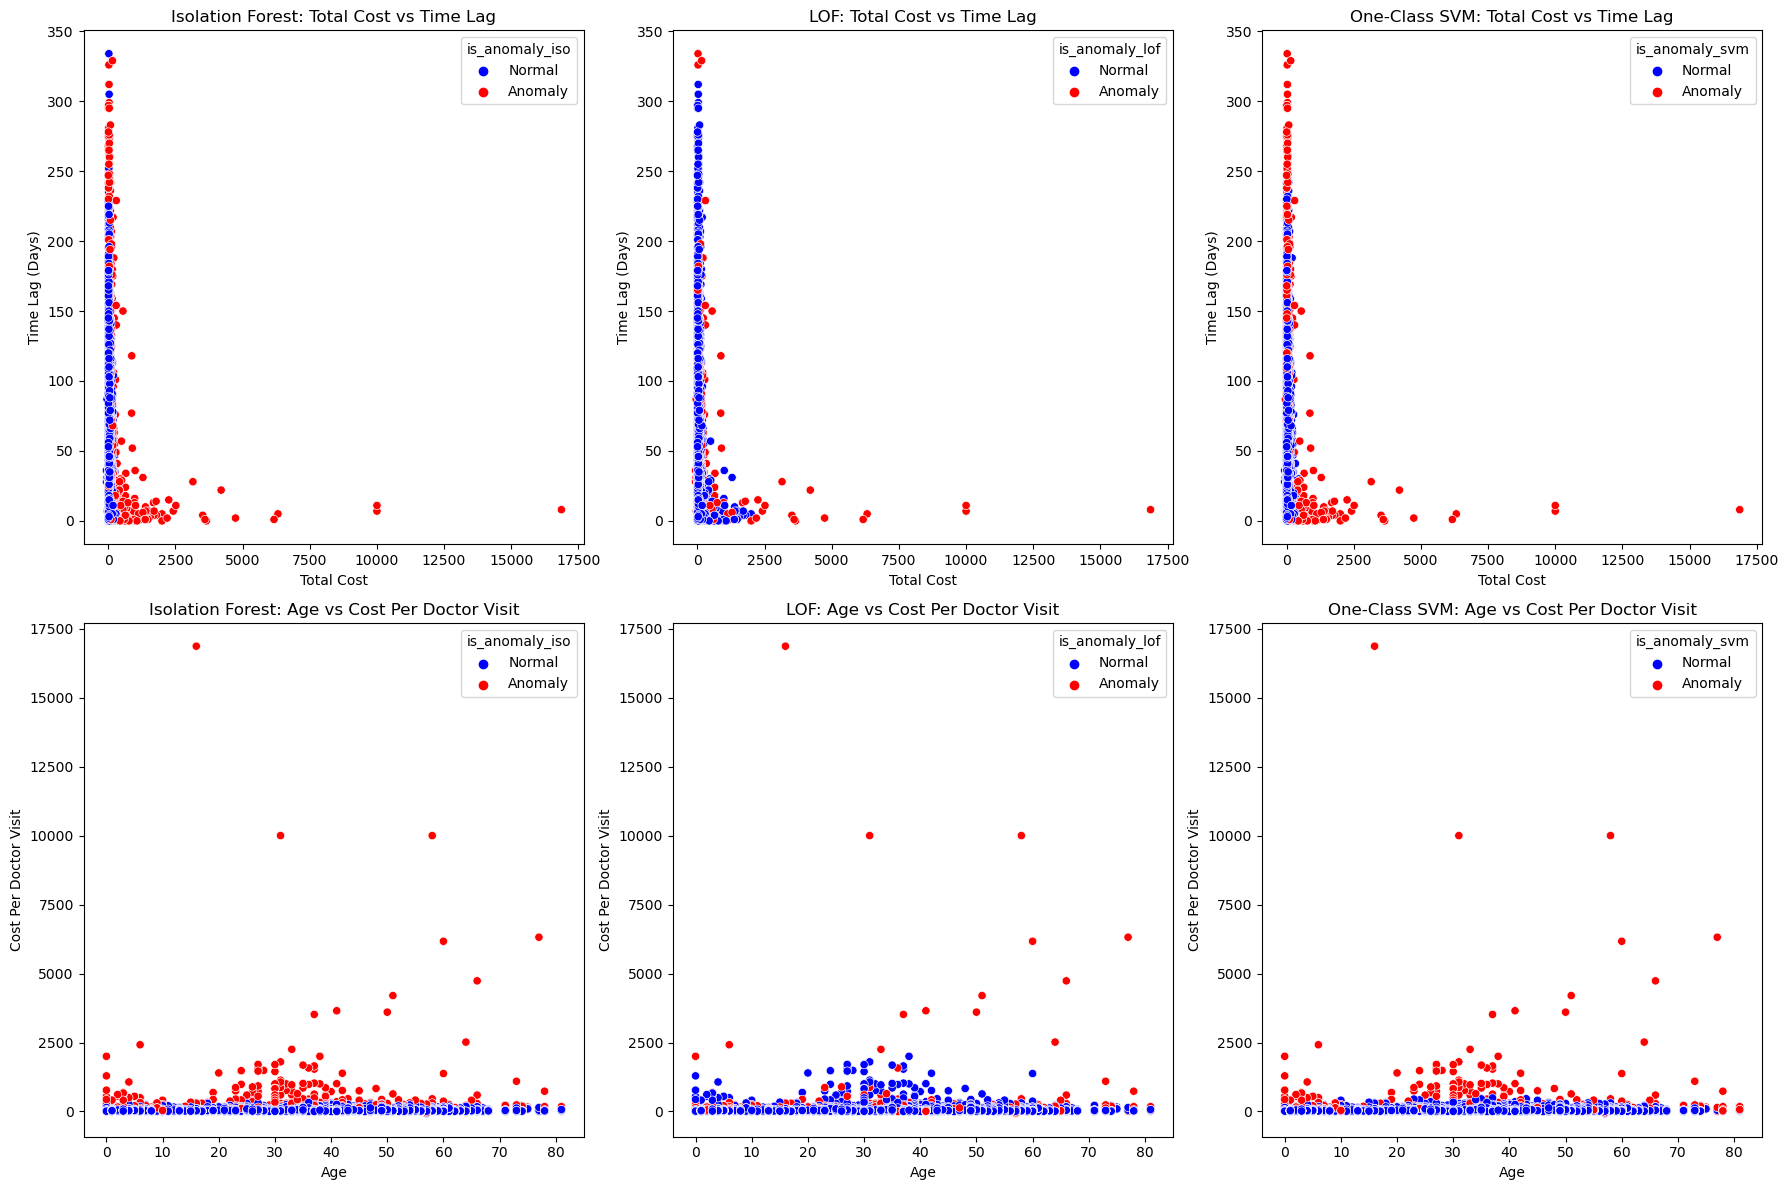

In [108]:
# Step 9: Visualize the anomalies detected by all three methods with different feature combinations
plt.figure(figsize=(18, 12))

# Isolation Forest: Total Cost vs Time Lag
plt.subplot(2, 3, 1)
sns.scatterplot(x=anomaly_ml_results['total_cost'], y=anomaly_ml_results['time_lag_days'], hue=anomaly_ml_results['is_anomaly_iso'], palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Isolation Forest: Total Cost vs Time Lag')
plt.xlabel('Total Cost')
plt.ylabel('Time Lag (Days)')

# LOF: Total Cost vs Time Lag
plt.subplot(2, 3, 2)
sns.scatterplot(x=anomaly_ml_results['total_cost'], y=anomaly_ml_results['time_lag_days'], hue=anomaly_ml_results['is_anomaly_lof'], palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('LOF: Total Cost vs Time Lag')
plt.xlabel('Total Cost')
plt.ylabel('Time Lag (Days)')

# One-Class SVM: Total Cost vs Time Lag
plt.subplot(2, 3, 3)
sns.scatterplot(x=anomaly_ml_results['total_cost'], y=anomaly_ml_results['time_lag_days'], hue=anomaly_ml_results['is_anomaly_svm'], palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('One-Class SVM: Total Cost vs Time Lag')
plt.xlabel('Total Cost')
plt.ylabel('Time Lag (Days)')

# Isolation Forest: Age vs Cost Per Doctor Visit
plt.subplot(2, 3, 4)
sns.scatterplot(x=anomaly_ml_results['age'], y=anomaly_ml_results['cost_per_doctor_visit'], hue=anomaly_ml_results['is_anomaly_iso'], palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Isolation Forest: Age vs Cost Per Doctor Visit')
plt.xlabel('Age')
plt.ylabel('Cost Per Doctor Visit')

# LOF: Age vs Cost Per Doctor Visit
plt.subplot(2, 3, 5)
sns.scatterplot(x=anomaly_ml_results['age'], y=anomaly_ml_results['cost_per_doctor_visit'], hue=anomaly_ml_results['is_anomaly_lof'], palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('LOF: Age vs Cost Per Doctor Visit')
plt.xlabel('Age')
plt.ylabel('Cost Per Doctor Visit')

# One-Class SVM: Age vs Cost Per Doctor Visit
plt.subplot(2, 3, 6)
sns.scatterplot(x=anomaly_ml_results['age'], y=anomaly_ml_results['cost_per_doctor_visit'], hue=anomaly_ml_results['is_anomaly_svm'], palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('One-Class SVM: Age vs Cost Per Doctor Visit')
plt.xlabel('Age')
plt.ylabel('Cost Per Doctor Visit')

plt.tight_layout()
plt.show()

Interpretation of the Plots:
Top Row (Total Cost vs Time Lag):

1. Isolation Forest (left), LOF (middle), and One-Class SVM (right) all show a similar pattern where anomalies (red points) tend to cluster in regions where both total cost and time lag are either very high or have extreme combinations.
    - For low-cost claims (below 2500), there are more normal claims (blue points), and anomalies appear scattered among high-cost and high-time lag values.
    - In all three models, there are some extreme outliers where claims exceed 10,000 in total cost, which are marked as anomalies.

2. Bottom Row (Age vs Cost Per Doctor Visit):
    - Isolation Forest (left), LOF (middle), and One-Class SVM (right) highlight some high outliers where the cost per doctor visit is very high (over 5000) for relatively younger patients (under 40 years old).
    - Most of the anomalies are located around younger patients with high costs, while patients with average age and moderate costs are largely labeled as normal.

What the Plots Suggest:
- Consistent Anomalies Across Models: The same areas of high total cost and high time lag or high cost per doctor visit are consistently flagged as anomalies by all three models. This suggests that these regions are likely true outliers and worth further investigation.
- Cost Sensitivity: All models seem particularly sensitive to total cost and cost per doctor visit, as the most extreme values in these dimensions are flagged as anomalies.
- Time Lag: Time lag contributes to anomalies, particularly when it is high, in combination with other features like total cost.

# 5. Feature and Correlation Analysis

## 5.1 Correlation Matrix 

In [109]:
numeric_features

['num_rows_per_claim',
 'total_cost',
 'num_doctor_visits',
 'age',
 'time_lag_days',
 'cost_per_doctor_visit']

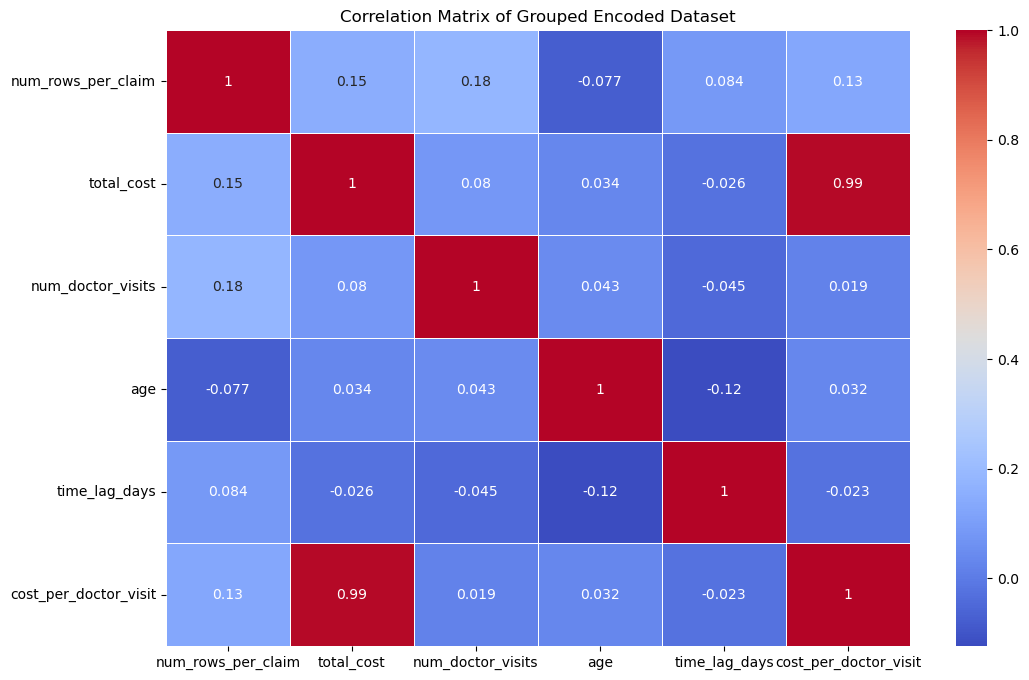

In [110]:
# Calculate the correlation matrix
corr_matrix = dataset_encoded[numeric_features].corr()

# Visualize the matrix 
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Grouped Encoded Dataset')
plt.show()

## 5.2 Other Multivariate Analysis (to complete)

Add PCA

# 6. Claims Patterns and Policy Abuse Detection

**6.1 Data Preparation** <br>
Build comprehensive primary and secondary datasets to enable thorough analysis of claims patterns and behaviors

**6.2 Visit Pattern Analysis** <br>
Investigate frequency and patterns of doctor visits, focusing on repeated visits between same patient-doctor pairs to identify potential overutilization

**6.3 Temporal Analysis** <br>
Study the timing and frequency of claims by individual patients to detect unusual claiming patterns or potential abuse

**6.4 Medical Service Analysis** <br>
Examine the sequence and necessity of medical procedures, tests and follow-ups to identify possible unnecessary or excessive medical services

#### Dataset

In [111]:
grouped_data_extended.to_csv('tested_data.csv', index=False)

tested_data = pd.read_csv('tested_data.csv')

tested_data.head()

,Insured Reference,DATE_OF_CLAIM,num_rows_per_claim,total_cost,num_doctor_visits,class_value,gender,marital_status,age,previous_claim_date,time_lag,time_lag_days,cost_per_doctor_visit
0,1,2023-01-07,7,57.559,1,Second,Male,Married,43.0,NaN,NaN,NaN,57.559
1,1,2023-02-06,4,48.395,1,Second,Male,Married,43.0,2023-01-07,30 days,30.0,48.395
2,1,2023-03-15,4,48.395,1,Second,Male,Married,43.0,2023-02-06,37 days,37.0,48.395
3,1,2023-04-12,7,57.559,1,Second,Male,Married,43.0,2023-03-15,28 days,28.0,57.559
4,1,2023-05-09,4,48.395,1,Second,Male,Married,43.0,2023-04-12,27 days,27.0,48.395


In [112]:
tested_data.columns

Index(['Insured Reference', 'DATE_OF_CLAIM', 'num_rows_per_claim',
       'total_cost', 'num_doctor_visits', 'class_value', 'gender',
       'marital_status', 'age', 'previous_claim_date', 'time_lag',
       'time_lag_days', 'cost_per_doctor_visit'],
      dtype='object')

In [113]:
primary_data = tested_data

## 6.1 Data Preparation

### 6.1.1 Primary Dataset

**Columns**: Insured Reference, DATE_OF_CLAIM, num_rows_per_claim, total_cost, num_doctor_visits, class_value, gender, marital_status, age, previous_claim_date, time_lag, time_lag_days, cost_per_doctor_visit

**TO ADD**: hof_reference, payment_type, visit_type, benefit, dependence, HCP_ID, Indication, Doctor_ID, HCP_Code, HCP_Type 

In [114]:
claims_data.columns

Index(['Scheme ref', 'Insured Reference', 'HOF Reference', 'CLASS',
       'COST_VALUE', 'DATE_OF_CLAIM', 'DATE_RECEIVED', 'VISIT_DATE',
       'PROCESSING_STATUS', 'PROCESSING_DATE', 'PAYMENT', 'VISIT_TYPE',
       'Benefit', 'DEPENDANCE', 'HCP_ID', 'Indiciation', 'DOCTOR_ID',
       'HCP_CODE', 'HCP_TYPE', 'SPECIALTY', 'EFFECTIVE_DATE', 'ITEM_ID',
       'CLAIMED_ITEM', 'ICD9_CODE', 'DIAGNOSIS', 'PROCESSING_RESULT'],
      dtype='object')

#### HOF Reference (Added)
**Note**: All had one hof reference

In [115]:
# Check if each insured reference has one HOF reference
hof_consistency = claims_data.groupby('Insured Reference')['HOF Reference'].nunique().reset_index()

# Check for multiple HOF references
multiple_hofs = hof_consistency[hof_consistency['HOF Reference'] > 1]

if multiple_hofs.empty:
    print('Each Insured Reference has one HOF Reference')
else:
    print('Some Insured References have multiple HOF References')
    print(f'\nNumber of Insured References with multiple HOF References: {len(multiple_hofs)}')


Each Insured Reference has one HOF Reference


In [116]:
# Create mapping between Insured Reference and HOF Reference
hof_mapping = claims_data[['Insured Reference', 'HOF Reference']].drop_duplicates()

# Convert Insured Reference to int64 in both dataframes to match types
hof_mapping['Insured Reference'] = hof_mapping['Insured Reference'].astype(int)
primary_data['Insured Reference'] = primary_data['Insured Reference'].astype(int)

# Add HOF Reference to primary dataset
primary_data = primary_data.merge(hof_mapping, on='Insured Reference', how='left')

# Rename column to lowercase for consistency
primary_data = primary_data.rename(columns={'HOF Reference': 'hof_reference'})


#### Payment Type

**Note:** Payment type is mixed 152 were found to have multiple payment types, for now payment type will be excluded

In [117]:
# Check if each claim has one payment type
payment_consistency = claims_data.groupby('Insured Reference')['PAYMENT'].nunique().reset_index()

# Check for multiple payment types
multiple_payments = payment_consistency[payment_consistency['PAYMENT'] > 1]

if multiple_payments.empty:
    print('Each Insured Reference has one payment type')
else:
    print('Some Insured References have multiple payment types')
    print(f'\nTotal number of Insured References: {len(payment_consistency)}')
    print(f'Number of Insured References with multiple payment types: {len(multiple_payments)}')

Some Insured References have multiple payment types

Total number of Insured References: 1516
Number of Insured References with multiple payment types: 152


#### Class Consistency Test

In [118]:
# Does each insure reference have one class
class_consistency = claims_data.groupby('Insured Reference')['CLASS'].nunique().reset_index()

# Check for multiple classes
multiple_classes = class_consistency[class_consistency['CLASS']>1]

if multiple_classes.empty:
    print('Each insured Reference have one class')
else:
    print('Multiples exist')

Each insured Reference have one class


<Axes: xlabel='class_value', ylabel='count'>

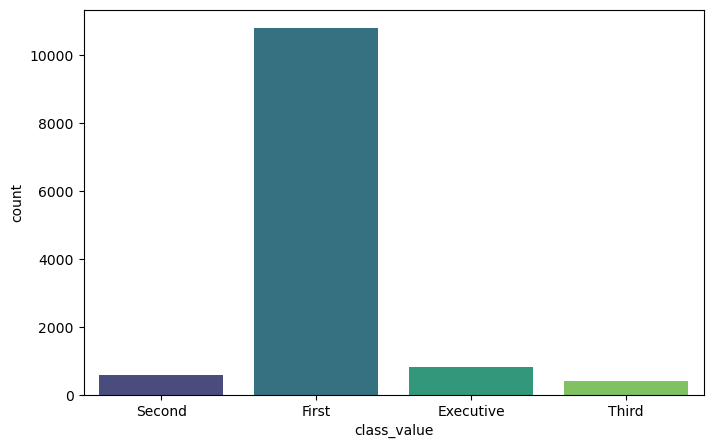

In [119]:
# Plot 
plt.figure(figsize=(8,5))
sns.countplot(data=tested_data, x='class_value', palette='viridis')

#### Visit Type

**Note:** Many had multiple visit types, 159 of them

In [120]:
# Check if each claim has one visit type
visit_type_consistency = claims_data.groupby('Insured Reference')['VISIT_TYPE'].nunique().reset_index()

# Check for multiple visit types
multiple_visits = visit_type_consistency[visit_type_consistency['VISIT_TYPE'] > 1]

if multiple_visits.empty:
    print('Each Insured Reference has one visit type')
else:
    print('Some Insured References have multiple visit types')
    print(f'\nTotal number of Insured References: {len(visit_type_consistency)}')
    print(f'Number of Insured References with multiple visit types: {len(multiple_visits)}')


Some Insured References have multiple visit types

Total number of Insured References: 1516
Number of Insured References with multiple visit types: 159


#### Benefit

**Note:** Number of Insured References with multiple benefit types: 452

In [121]:
# Check if each claim has one benefit type
benefit_consistency = claims_data.groupby('Insured Reference')['Benefit'].nunique().reset_index()

# Check for multiple benefit types
multiple_benefits = benefit_consistency[benefit_consistency['Benefit'] > 1]

if multiple_benefits.empty:
    print('Each Insured Reference has one benefit type')
else:
    print('Some Insured References have multiple benefit types')
    print(f'\nTotal number of Insured References: {len(benefit_consistency)}')
    print(f'Number of Insured References with multiple benefit types: {len(multiple_benefits)}')


Some Insured References have multiple benefit types

Total number of Insured References: 1516
Number of Insured References with multiple benefit types: 452


#### Dependence (Added)

In [122]:
# Check if each claim has one dependence type
dependence_consistency = claims_data.groupby('Insured Reference')['DEPENDANCE'].nunique().reset_index()

# Check for multiple dependence types
multiple_dependence = dependence_consistency[dependence_consistency['DEPENDANCE'] > 1]

if multiple_dependence.empty:
    print('Each Insured Reference has one dependence type')
else:
    print('Some Insured References have multiple dependence types')
    print(f'\nTotal number of Insured References: {len(dependence_consistency)}')
    print(f'Number of Insured References with multiple dependence types: {len(multiple_dependence)}')

Each Insured Reference has one dependence type


In [123]:
# First drop any existing dependence columns to avoid duplicates
cols_to_drop = [col for col in primary_data.columns if 'depend' in col.lower()]
primary_data = primary_data.drop(columns=cols_to_drop)

# Create dependence mapping with most common value per Insured Reference
dependence_mapping = claims_data.groupby('Insured Reference')['DEPENDANCE'].agg(lambda x: x.value_counts().index[0]).reset_index()
dependence_mapping = dependence_mapping.rename(columns={'DEPENDANCE': 'dependence_type'})

# Merge with primary_data
primary_data = primary_data.merge(dependence_mapping, on='Insured Reference', how='left')

# Display first few rows to verify
print("\n")
print(primary_data.head())

ValueError: You are trying to merge on int32 and object columns for key 'Insured Reference'. If you wish to proceed you should use pd.concat

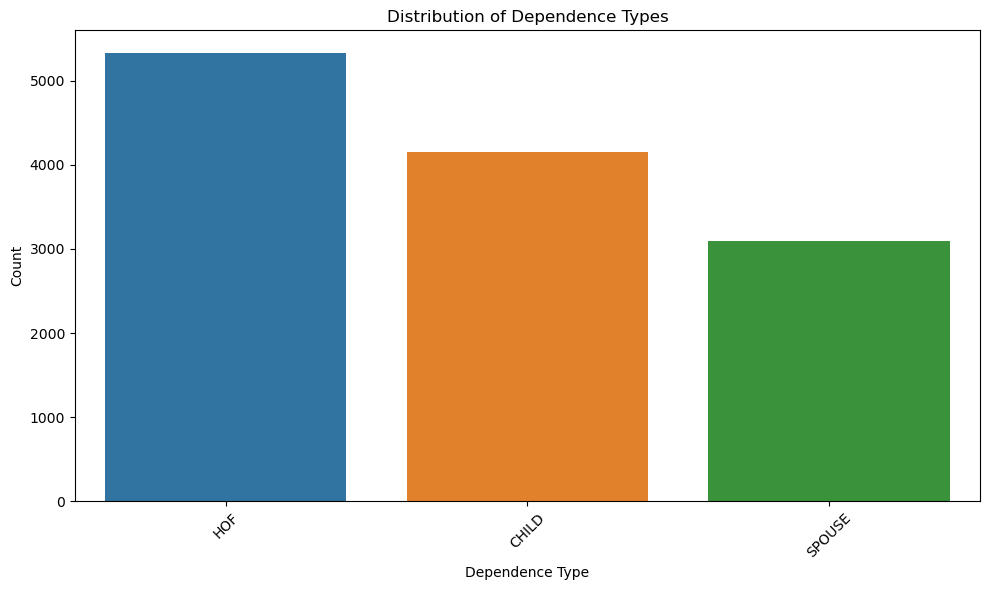

In [92]:
# Plot dependence type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=primary_data, x='dependence_type')
plt.title('Distribution of Dependence Types')
plt.xlabel('Dependence Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### HCP ID

Some Insured References have multiple HCP IDs

Total number of Insured References: 1516
Number of Insured References with multiple HCP IDs: 1487


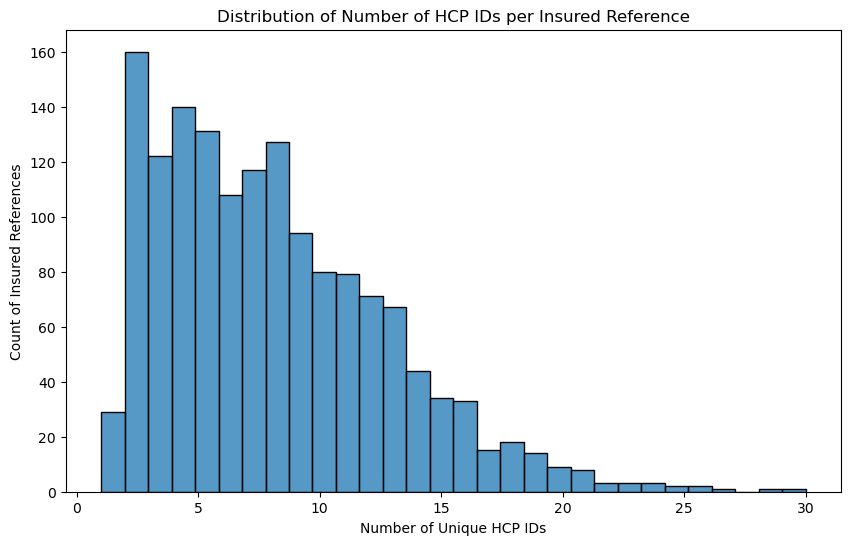

In [93]:
# Check for multiple HCP IDs per Insured Reference
hcp_consistency = claims_data.groupby('Insured Reference')['HCP_ID'].nunique().reset_index()
hcp_consistency = hcp_consistency.rename(columns={'HCP_ID': 'num_hcp_ids'})

multiple_hcp = hcp_consistency[hcp_consistency['num_hcp_ids'] > 1]

if multiple_hcp.empty:
    print('Each Insured Reference has one HCP ID')
else:
    print('Some Insured References have multiple HCP IDs')
    print(f'\nTotal number of Insured References: {len(hcp_consistency)}')
    print(f'Number of Insured References with multiple HCP IDs: {len(multiple_hcp)}')
    
    # Show distribution of number of HCP IDs per Insured Reference
    plt.figure(figsize=(10, 6))
    sns.histplot(data=hcp_consistency, x='num_hcp_ids', bins=30)
    plt.title('Distribution of Number of HCP IDs per Insured Reference')
    plt.xlabel('Number of Unique HCP IDs')
    plt.ylabel('Count of Insured References')
    plt.show()
        

#### Indication 

Some Insured References have multiple Indication values

Total number of Insured References: 1516
Number of Insured References with multiple Indications: 155


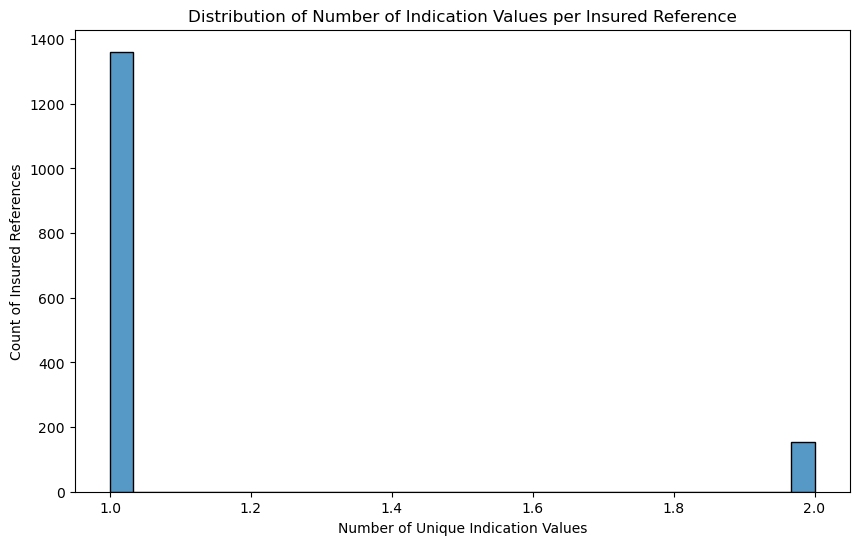

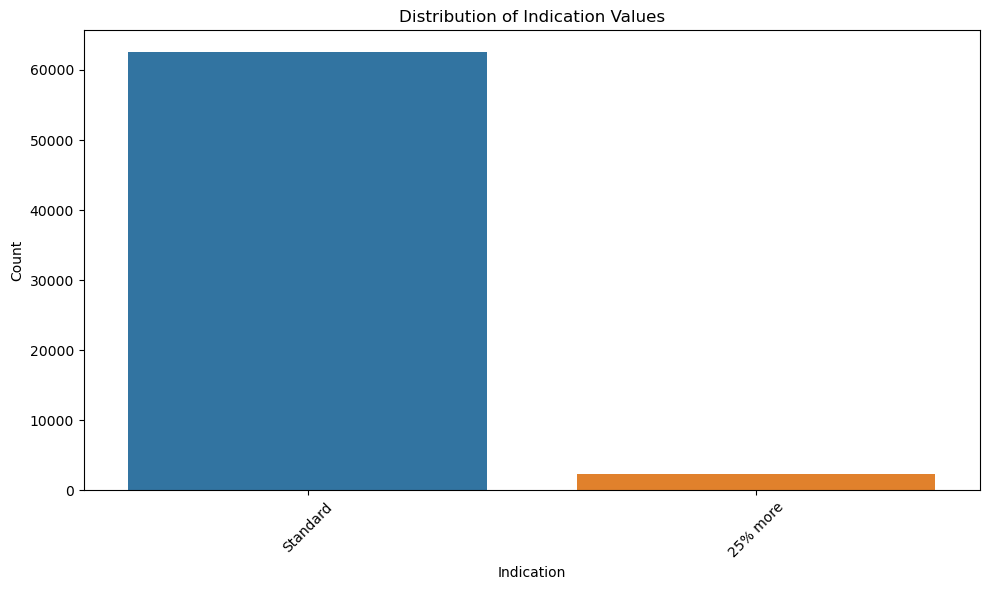

In [94]:
# Check for multiple Indication values per Insured Reference
indication_consistency = claims_data.groupby('Insured Reference')['Indiciation'].nunique().reset_index()
indication_consistency = indication_consistency.rename(columns={'Indiciation': 'num_indications'})

multiple_indications = indication_consistency[indication_consistency['num_indications'] > 1]

if multiple_indications.empty:
    print('Each Insured Reference has one Indication value')
else:
    print('Some Insured References have multiple Indication values')
    print(f'\nTotal number of Insured References: {len(indication_consistency)}')
    print(f'Number of Insured References with multiple Indications: {len(multiple_indications)}')
    
    # Show distribution of number of Indication values per Insured Reference
    plt.figure(figsize=(10, 6))
    sns.histplot(data=indication_consistency, x='num_indications', bins=30)
    plt.title('Distribution of Number of Indication Values per Insured Reference')
    plt.xlabel('Number of Unique Indication Values')
    plt.ylabel('Count of Insured References')
    plt.show()

# Plot distribution of Indication values
plt.figure(figsize=(10, 6))
sns.countplot(data=claims_data, x='Indiciation')
plt.title('Distribution of Indication Values')
plt.xlabel('Indication')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Doctor ID 

Some Insured References have multiple Doctor IDs

Total number of Insured References: 1516
Number of Insured References with multiple Doctor IDs: 1222


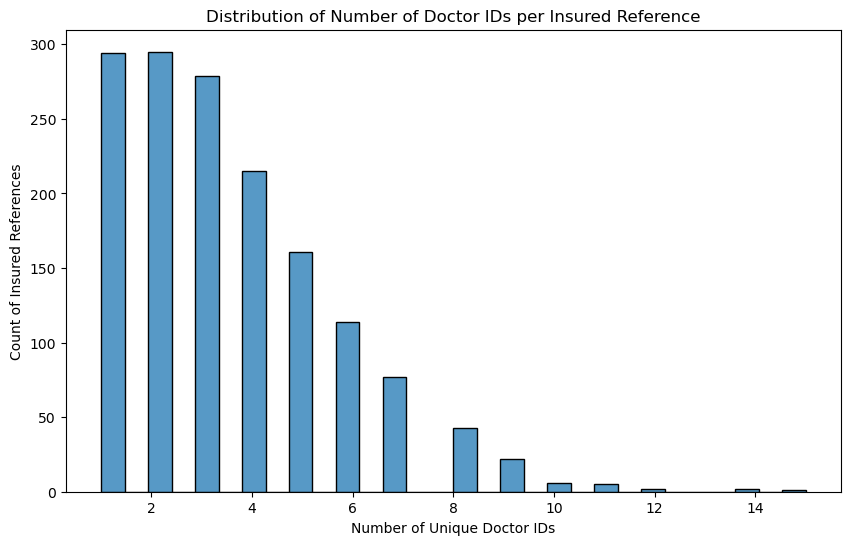

ValueError: Could not interpret input 'doctor_id'

<Figure size 1000x600 with 0 Axes>

In [96]:
# Check for multiple Doctor IDs per Insured Reference
doctor_consistency = claims_data.groupby('Insured Reference')['DOCTOR_ID'].nunique().reset_index()
doctor_consistency = doctor_consistency.rename(columns={'DOCTOR_ID': 'num_doctors'})

multiple_doctors = doctor_consistency[doctor_consistency['num_doctors'] > 1]

if multiple_doctors.empty:
    print('Each Insured Reference has one Doctor ID')
else:
    print('Some Insured References have multiple Doctor IDs')
    print(f'\nTotal number of Insured References: {len(doctor_consistency)}')
    print(f'Number of Insured References with multiple Doctor IDs: {len(multiple_doctors)}')
    
    # Show distribution of number of Doctor IDs per Insured Reference
    plt.figure(figsize=(10, 6))
    sns.histplot(data=doctor_consistency, x='num_doctors', bins=30)
    plt.title('Distribution of Number of Doctor IDs per Insured Reference')
    plt.xlabel('Number of Unique Doctor IDs')
    plt.ylabel('Count of Insured References')
    plt.show()

# Plot distribution of Doctor IDs
plt.figure(figsize=(10, 6))
sns.countplot(data=claims_data, x='doctor_id')
plt.title('Distribution of Doctor IDs')
plt.xlabel('Doctor ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### HCP Code   

Some Insured References have multiple HCP Codes

Total number of Insured References: 1516
Number of Insured References with multiple HCP Codes: 1481


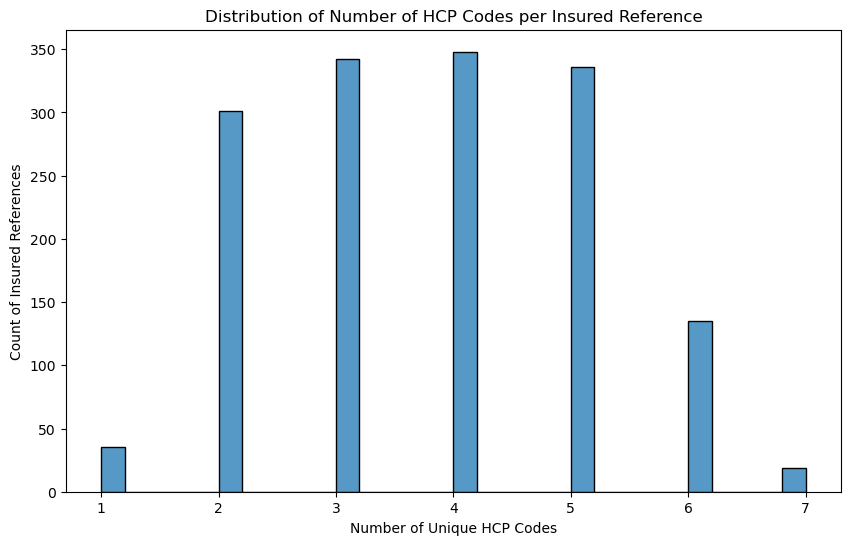

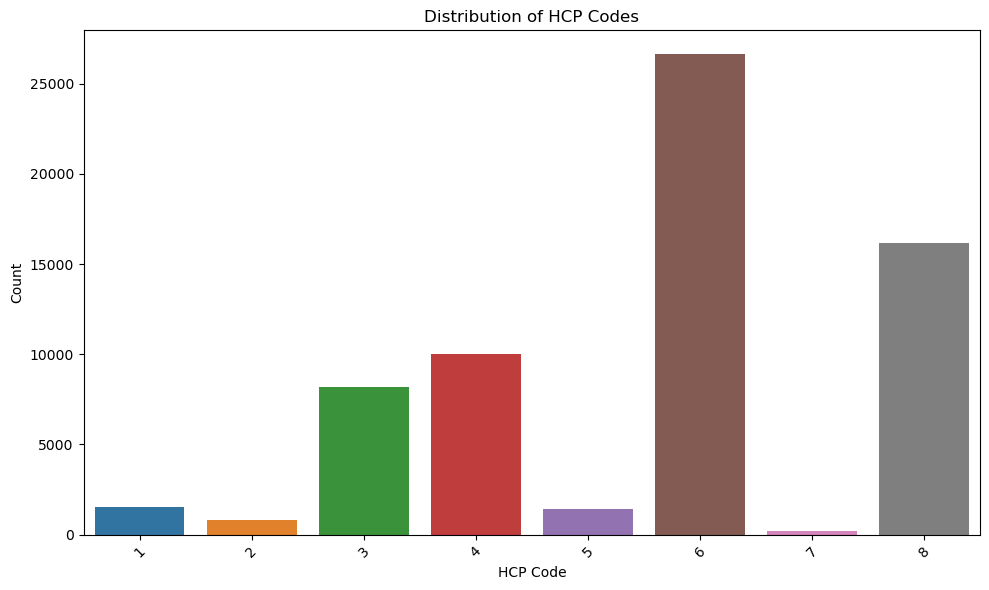

In [97]:
# Check for multiple HCP Codes per Insured Reference
hcp_code_consistency = claims_data.groupby('Insured Reference')['HCP_CODE'].nunique().reset_index()
hcp_code_consistency = hcp_code_consistency.rename(columns={'HCP_CODE': 'num_hcp_codes'})

multiple_hcp_codes = hcp_code_consistency[hcp_code_consistency['num_hcp_codes'] > 1]

if multiple_hcp_codes.empty:
    print('Each Insured Reference has one HCP Code')
else:
    print('Some Insured References have multiple HCP Codes')
    print(f'\nTotal number of Insured References: {len(hcp_code_consistency)}')
    print(f'Number of Insured References with multiple HCP Codes: {len(multiple_hcp_codes)}')
    
    # Show distribution of number of HCP Codes per Insured Reference
    plt.figure(figsize=(10, 6))
    sns.histplot(data=hcp_code_consistency, x='num_hcp_codes', bins=30)
    plt.title('Distribution of Number of HCP Codes per Insured Reference')
    plt.xlabel('Number of Unique HCP Codes')
    plt.ylabel('Count of Insured References')
    plt.show()

# Plot distribution of HCP Codes
plt.figure(figsize=(10, 6))
sns.countplot(data=claims_data, x='HCP_CODE')
plt.title('Distribution of HCP Codes')
plt.xlabel('HCP Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### HCP Type

Some Insured References have multiple HCP Types

Total number of Insured References: 1516
Number of Insured References with multiple HCP Types: 1481


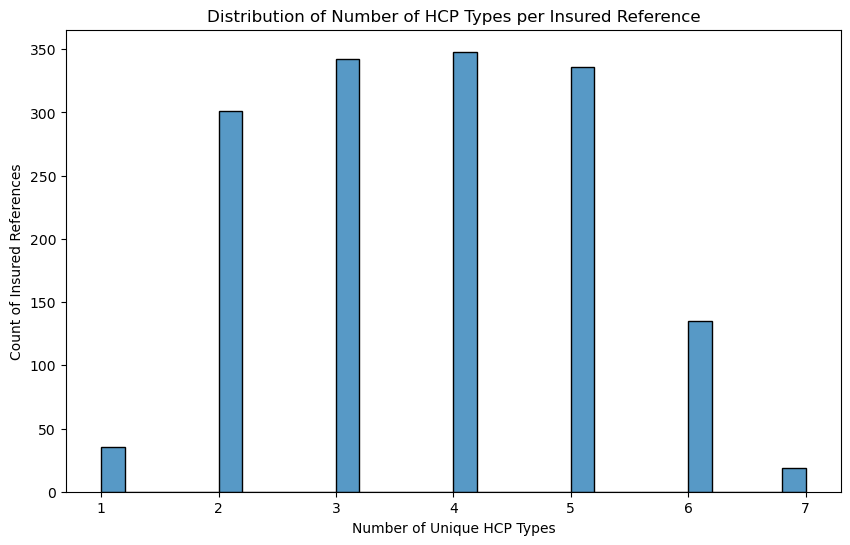

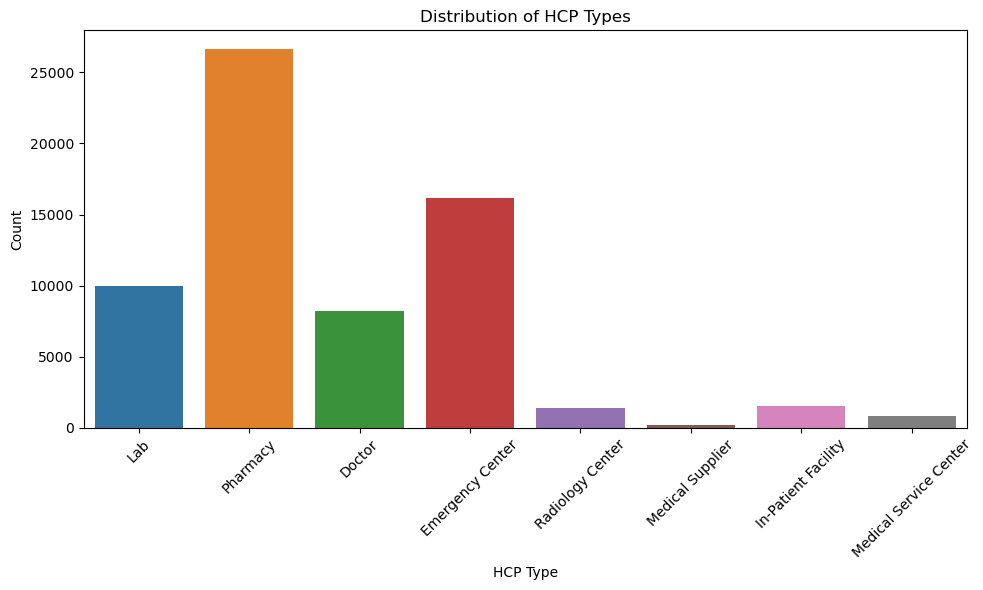

In [98]:
# Check for multiple HCP Types per Insured Reference
hcp_type_consistency = claims_data.groupby('Insured Reference')['HCP_TYPE'].nunique().reset_index()
hcp_type_consistency = hcp_type_consistency.rename(columns={'HCP_TYPE': 'num_hcp_types'})

multiple_hcp_types = hcp_type_consistency[hcp_type_consistency['num_hcp_types'] > 1]

if multiple_hcp_types.empty:
    print('Each Insured Reference has one HCP Type')
else:
    print('Some Insured References have multiple HCP Types')
    print(f'\nTotal number of Insured References: {len(hcp_type_consistency)}')
    print(f'Number of Insured References with multiple HCP Types: {len(multiple_hcp_types)}')
    
    # Show distribution of number of HCP Types per Insured Reference
    plt.figure(figsize=(10, 6))
    sns.histplot(data=hcp_type_consistency, x='num_hcp_types', bins=30)
    plt.title('Distribution of Number of HCP Types per Insured Reference')
    plt.xlabel('Number of Unique HCP Types')
    plt.ylabel('Count of Insured References')
    plt.show()

# Plot distribution of HCP Types
plt.figure(figsize=(10, 6))
sns.countplot(data=claims_data, x='HCP_TYPE')
plt.title('Distribution of HCP Types')
plt.xlabel('HCP Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Primary Dataset

In [99]:
primary_data.head()

,Insured Reference,DATE_OF_CLAIM,num_rows_per_claim,total_cost,num_doctor_visits,class_value,gender,marital_status,age,previous_claim_date,...,payment_type,visit_type,benefit,hcp_id,indication,doctor_id,hcp_code,hcp_type,HOF Reference,dependence_type
0,1,2023-01-07,7,57.559,1,Second,Male,Married,43.0,NaN,...,NETWORK,OUT PATIENT,CHRONIC,4416,Standard,40,6,Pharmacy,1,HOF
1,1,2023-02-06,4,48.395,1,Second,Male,Married,43.0,2023-01-07,...,NETWORK,OUT PATIENT,CHRONIC,4416,Standard,40,6,Pharmacy,1,HOF
2,1,2023-03-15,4,48.395,1,Second,Male,Married,43.0,2023-02-06,...,NETWORK,OUT PATIENT,CHRONIC,4416,Standard,40,6,Pharmacy,1,HOF
3,1,2023-04-12,7,57.559,1,Second,Male,Married,43.0,2023-03-15,...,NETWORK,OUT PATIENT,CHRONIC,4416,Standard,40,6,Pharmacy,1,HOF
4,1,2023-05-09,4,48.395,1,Second,Male,Married,43.0,2023-04-12,...,NETWORK,OUT PATIENT,CHRONIC,4416,Standard,40,6,Pharmacy,1,HOF


In [100]:
primary_data.columns

Index(['Insured Reference', 'DATE_OF_CLAIM', 'num_rows_per_claim',
       'total_cost', 'num_doctor_visits', 'class_value', 'gender',
       'marital_status', 'age', 'previous_claim_date', 'time_lag',
       'time_lag_days', 'cost_per_doctor_visit', 'hof_reference',
       'payment_type', 'visit_type', 'benefit', 'hcp_id', 'indication',
       'doctor_id', 'hcp_code', 'hcp_type', 'HOF Reference',
       'dependence_type'],
      dtype='object')

In [101]:
# Remove columns with multiple values per Insured Reference that we checked for consistency
columns_to_drop = ['hcp_type', 'HCP_TYPE']
primary_data = primary_data.drop(columns=columns_to_drop, errors='ignore')

print("Columns removed:", columns_to_drop)
print("\nRemaining columns:")
print(primary_data.columns)

Columns removed: ['hcp_type', 'HCP_TYPE']

Remaining columns:
Index(['Insured Reference', 'DATE_OF_CLAIM', 'num_rows_per_claim',
       'total_cost', 'num_doctor_visits', 'class_value', 'gender',
       'marital_status', 'age', 'previous_claim_date', 'time_lag',
       'time_lag_days', 'cost_per_doctor_visit', 'hof_reference',
       'payment_type', 'visit_type', 'benefit', 'hcp_id', 'indication',
       'doctor_id', 'hcp_code', 'HOF Reference', 'dependence_type'],
      dtype='object')


Dataset Info:
--------------------------------------------------
Number of records: 12585
Number of unique patients: 1516

Basic statistics:
--------------------------------------------------
       Insured Reference  num_rows_per_claim    total_cost  num_doctor_visits  \
count       12585.000000        12585.000000  12585.000000       12585.000000   
mean          920.984108            5.158840     53.779186           1.038697   
std           472.938312            4.952359    249.866690           0.204867   
min             1.000000            1.000000    -67.998000           1.000000   
25%           571.000000            2.000000     12.326000           1.000000   
50%           955.000000            4.000000     25.762000           1.000000   
75%          1306.000000            7.000000     50.093000           1.000000   
max          1719.000000           48.000000  16864.424000           4.000000   

                age  time_lag_days  cost_per_doctor_visit  hof_reference  \
co

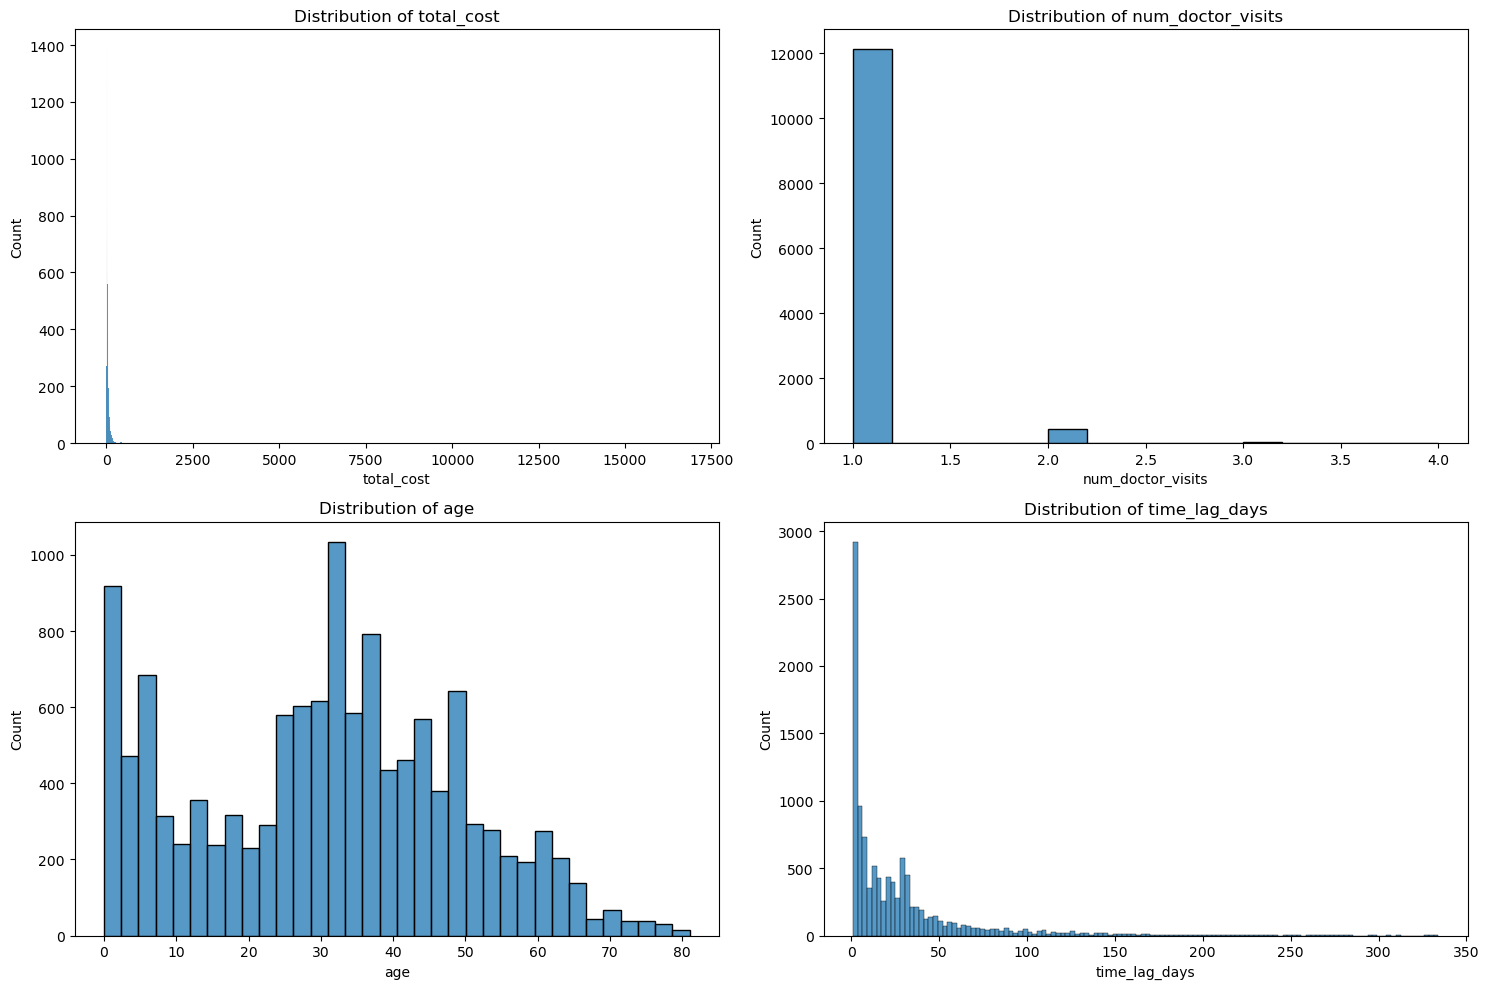

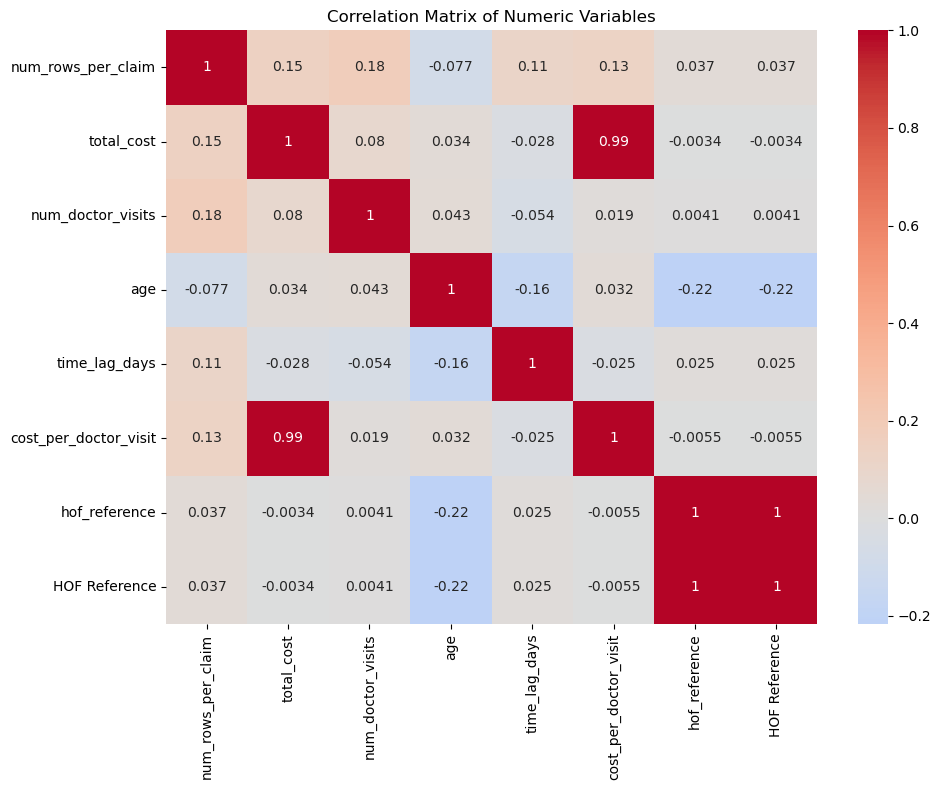

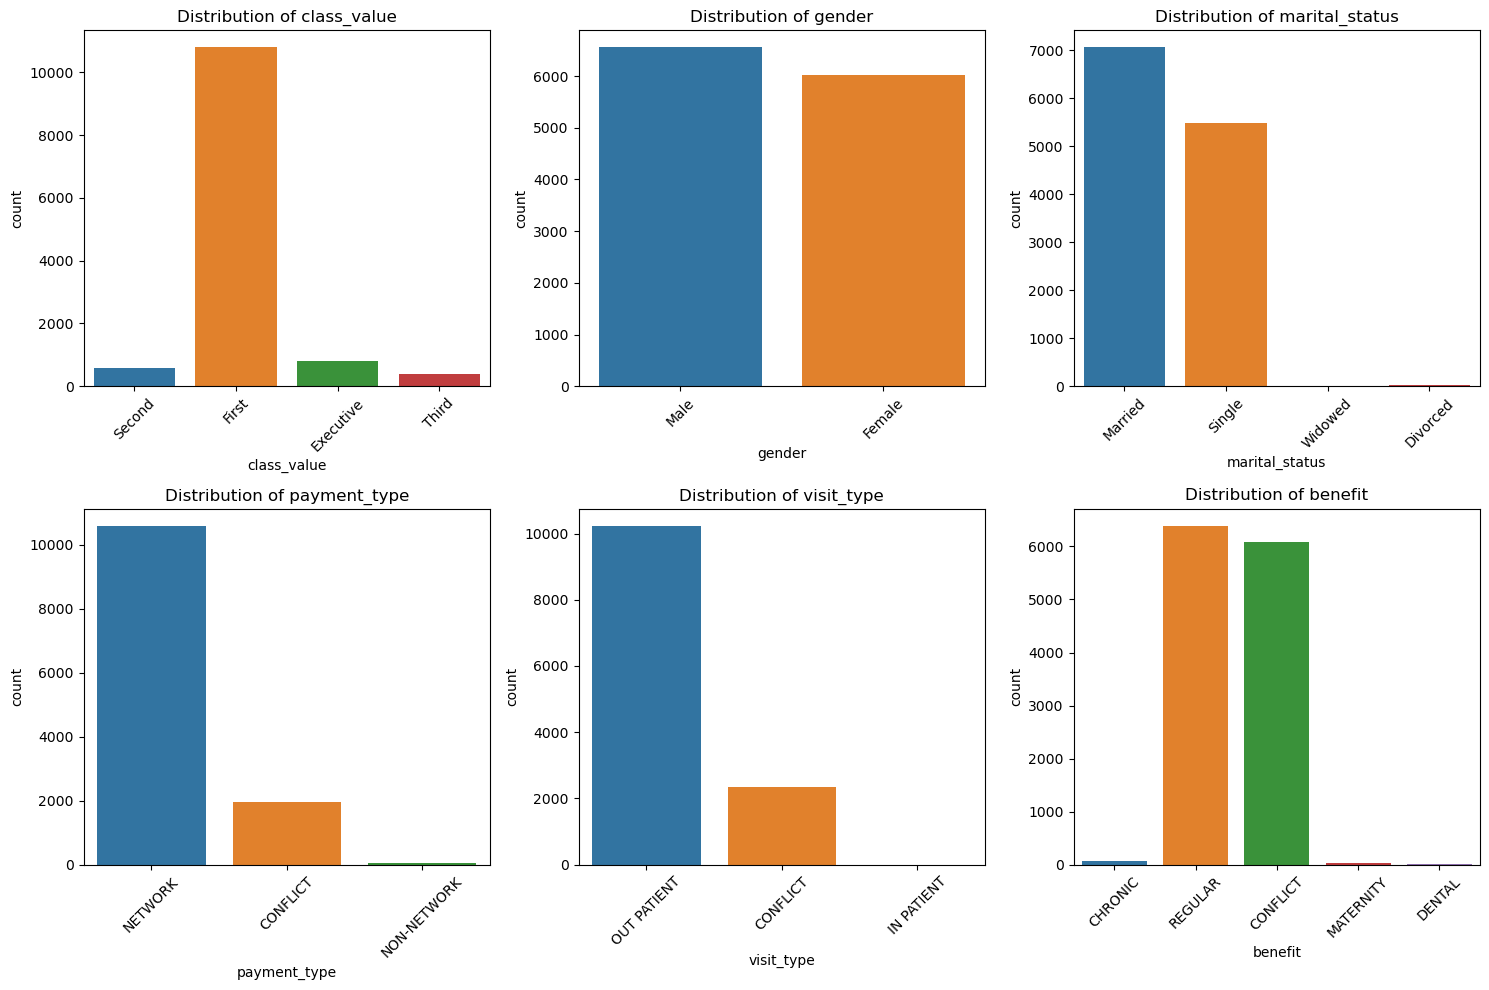


Average Cost by Class:
--------------------------------------------------
              mean  count
class_value              
Executive    79.81    807
First        52.81  10796
Second       37.34    584
Third        51.36    398


In [102]:
# Quick analysis of primary dataset

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
print(f"Number of records: {len(primary_data)}")
print(f"Number of unique patients: {primary_data['Insured Reference'].nunique()}")
print("\nBasic statistics:")
print("-" * 50)
print(primary_data.describe())

# Check for missing values
print("\nMissing Values:")
print("-" * 50)
print(primary_data.isnull().sum())

# Plot key numeric variables distributions
numeric_cols = ['total_cost', 'num_doctor_visits', 'age', 'time_lag_days']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=primary_data, x=col)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Show correlation matrix for numeric columns
numeric_data = primary_data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Analyze categorical variables
categorical_cols = ['class_value', 'gender', 'marital_status', 'payment_type', 'visit_type', 'benefit']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=primary_data, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Calculate average cost by class value
avg_cost_by_class = primary_data.groupby('class_value')['total_cost'].agg(['mean', 'count']).round(2)
print("\nAverage Cost by Class:")
print("-" * 50)
print(avg_cost_by_class)


### 6.1.2 Secondary Dataset

**Columns**: Insured Reference, Claim_ID, Specialty, Item_ID, Claimed_Item, ICD9_Code, Diagnosis, Processing Result 

In [125]:
# Create secondary dataset with selected columns from claims and population data
secondary_cols = ['Insured Reference', 'ITEM_ID', 'CLAIMED_ITEM', 'ICD9_CODE', 
                 'DIAGNOSIS', 'PROCESSING_RESULT', 'SPECIALTY']

secondary_data = claims_data[secondary_cols].copy()

# Add unique claim ID
secondary_data['Claim_ID'] = range(1, len(secondary_data) + 1)

# Display info about secondary dataset
print("Secondary Dataset Info:")
print("-" * 50)
print(secondary_data.info())

print("\nMissing Values:")
print("-" * 50)
print(secondary_data.isnull().sum())

# Show sample of data
print("\nSample of Secondary Dataset:")
print("-" * 50)
print(secondary_data.head())

# Show top diagnoses and claimed items
print("\nTop 10 Most Common Diagnoses:")
print("-" * 50)
print(secondary_data['DIAGNOSIS'].value_counts().head(10))

print("\nTop 10 Most Common Claimed Items:")
print("-" * 50)
print(secondary_data['CLAIMED_ITEM'].value_counts().head(10))


Secondary Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64924 entries, 0 to 64923
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Insured Reference  64924 non-null  object
 1   ITEM_ID            64924 non-null  object
 2   CLAIMED_ITEM       64924 non-null  object
 3   ICD9_CODE          64921 non-null  object
 4   DIAGNOSIS          64921 non-null  object
 5   PROCESSING_RESULT  64924 non-null  object
 6   SPECIALTY          64924 non-null  object
 7   Claim_ID           64924 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 4.0+ MB
None

Missing Values:
--------------------------------------------------
Insured Reference    0
ITEM_ID              0
CLAIMED_ITEM         0
ICD9_CODE            3
DIAGNOSIS            3
PROCESSING_RESULT    0
SPECIALTY            0
Claim_ID             0
dtype: int64

Sample of Secondary Datase

## 6.1 Investigate Patterns Patient to Doctor Visits and same Doctor

## 6.2 

## 6.3